<a href="https://colab.research.google.com/github/villafue/Capstone_1-_Predict_House_Prices/blob/master/House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello! This is my first Data Science Project. It is also my first Capstone project with Springboard. I'll focus on the business aspect. I created a scenario where I'm trying to convince the Ames company to hire me and hire a data science team, in other words, to convince them that Data Science is valuable for their business model. To that end, I will do my best to keep it simple, marketable, and executable for the company. 

Last, I am thankful for the plethora of notebooks that others were kind enough to share on Kaggle. I adapted many of their codes and processes in my notebook. I'll credit them here:

1. [Comprehensive Data Exploration with Python - Pedro Marcelino, Feb 2017](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)
  - He did amazing EDA and helped me to learn as he told a story throughout the process.

2. [Stacked Regressions: Top 4% on LeaderBoard - Serigne, July 2017](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)
  - I really liked his data cleaning and imputing process. He described the logic behind what he did, and he also cleaned both the train and test set together (as did others).

3. [House Price Calculation methods for beginners - Bsivavenu, 2018](https://www.kaggle.com/bsivavenu/house-price-calculation-methods-for-beginners)
  - I used parts of his EDA especially for visualizing SalesPrice.

4. [#1 House Prices Solution (top 1%) - Jesuscristo (Nanashi), 2019](https://www.kaggle.com/jesucristo/1-house-prices-solution-top-1?scriptVersionId=20214677)
  - I used parts of his EDA for more detailed analysis

5. [Comprehensive Feature Engineering Tutorial - Pavan Sanagapati, 30 August 2020 ](https://www.kaggle.com/pavansanagapati/comprehensive-feature-engineering-tutorial)
  - Although not related to this specific dataset, his notebook was a big help in explaining the feature engineering in other people's notebooks.

6. [Stacking House Prices - Walkthrough to Top 5% - Arun Godwin Patel, 2018](https://www.kaggle.com/agodwinp/stacking-house-prices-walkthrough-to-top-5)
  - Arun's EDA and walkthrough is inviting, digestible, and beautiful. I adapted his code especially for visualizing the features.

***

## Content

1. **[Import packages](#import_packages)**
2. **[Load data](#load_data)**
3. **[Data preparation](#data_preparation)**
    - 3.1 - [Remove outliers](#remove_outliers)
    - 3.2 - [Treat missing values](#treat_missing_values)   
4. **[Exploratory Data Analysis](#exploratory_data_analysis)**
    - 4.1 - [Correlation matrix](#correlation_matrix)
    - 4.2 - [Feature engineering](#feature_engineering)
        - 4.2.1 - [Polynomials](#polynomials)
        - 4.2.2 - [Interior](#interior)
        - 4.2.3 - [Architectural & Structural](#architectural_&_structural)
        - 4.2.4 - [Exterior](#exterior)
        - 4.2.5 - [Location](#location)
        - 4.2.6 - [Land](#land)
        - 4.2.7 - [Access](#access)
        - 4.2.8 - [Utilities](#utilities)
        - 4.2.9 - [Miscellaneous](#miscellaneous)
    - 4.3 - [Target variable](#target_variable)
    - 4.4 - [Treating skewed features](#treating_skewed_features)
5. **[Modeling](#modeling)**
    - 5.1 - [Preparation of datasets](#preparation_of_datasets)
    - 5.2 - [Training](#training)
    - 5.3 - [Optimisation](#optimisation)
    - 5.4 - [Stacking](#stacking)
    - 5.5 - [Ensemble](#ensemble)
    - 5.6 - [Submission](#submission)
6. **[Conclusion](#conclusion)**   

***

<a id='import_packages'></a>
# 1. 
## Import packages

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from IPython.display import display
from scipy.stats.stats import pearsonr
pd.set_option('display.notebook_repr_html', True)
# I want to see all the columns in my output.
pd.set_option('max_columns', 82)
%matplotlib inline
pd.options.display.max_rows = 100
mycols = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]
sns.set_palette(palette = mycols, n_colors = 4)

In [2]:
# This first set of packages include Pandas, for data manipulation, numpy for mathematical computation and matplotlib & seaborn, for visualisation.
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')
print('Data Manipulation, Mathematical Computation and Visualisation packages imported!')

# Statistical packages used for transformations
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats.stats import pearsonr
print('Statistical packages imported!')

# Metrics used for measuring the accuracy and performance of the models
#from sklearn import metrics
#from sklearn.metrics import mean_squared_error
print('Metrics packages imported!')

# Algorithms used for modeling
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
print('Algorithm packages imported!')

# Pipeline and scaling preprocessing will be used for models that are sensitive
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print('Pipeline and preprocessing packages imported!')

# Model selection packages used for sampling dataset and optimising parameters
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
print('Model selection packages imported!')

# Set visualisation colours
mycols = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]
sns.set_palette(palette = mycols, n_colors = 4)
print('My colours are ready! :)')

# To ignore annoying warning
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
warnings.filterwarnings("ignore", category=DeprecationWarning)
print('Deprecation warning will be ignored!')

Data Manipulation, Mathematical Computation and Visualisation packages imported!
Statistical packages imported!
Metrics packages imported!
Algorithm packages imported!
Pipeline and preprocessing packages imported!
Model selection packages imported!
My colours are ready! :)
Deprecation warning will be ignored!


The following code make's plots viewable in Colab's darkmode.

In [3]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use(['seaborn-whitegrid'])

I'll change my home directory because this is where I upload files, from my computer, into Colab.

In [4]:
# os.chdir('sample_data')

<a id='load_data'></a>
# 2. 
## Load data

- The Pandas package helps us work with our datasets. We start by reading the training and test datasets into DataFrames.
- We want to save the 'Id' columns from both datasets for later use when preparing the submission data.
- But we can drop them from the training and test datasets as they are redundant.

I import the train and test files directly from my Github. I also print out the head and shapes so can take a quick look at the data. 

In [5]:
url = 'https://raw.githubusercontent.com/villafue/Capstone_1-_Predict_House_Prices/master/Data/test.csv'
test = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/villafue/Capstone_1-_Predict_House_Prices/master/Data/train.csv'
train = pd.read_csv(url)
print(test.shape, train.shape, '\n' * 2, 'Train has: ', train.shape[0], 'rows and ', train.shape[1], 'columns.', '\n', 
      'Test has: ', test.shape[0], 'rows and ', test.shape[1], 'columns.')
# This makes a little barrier between printed outputs.
print('\n', '=' * 136, '\n' * 2, 'Train Set:', '\n')
display(train.head())
print('\n', '=' * 136, '\n' * 2, 'Test Set:', '\n')
test.head()

(1459, 80) (1460, 81) 

 Train has:  1460 rows and  81 columns. 
 Test has:  1459 rows and  80 columns.


 Train Set: 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000




 Test Set: 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


I want to see the column names. Train and test have the column names except the latter does not have the price column.

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

I'm going to save the "ID" columns and then drop them from the dataframes as they're unnecessary for modeling. 

Here is a helpful link for ".format" and strings. [Python Format Function](https://www.geeksforgeeks.org/python-format-function/#:~:text=Diamond%20star%20pattern-,Python%20%7C%20format()%20function,a%20string%20through%20positional%20formatting.)

In [7]:
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

print("The train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


I will concatenate the train and test sets into one dataframe so I can study and clean it. 

In [8]:
# I'm saving the shape of the train and test set.
ntrain = train.shape[0]
ntest = test.shape[0]
# I guess this is because I'm going to use this for y-train later
y_train = train.SalePrice.values

all = pd.concat((train, test)).reset_index(drop=True)
all.drop(['SalePrice'], axis=1, inplace=True)
print("The full data size is : {}".format(all.shape))

The full data size is : (2919, 79)


I want to see the count of non-null values and if the columns are numeric or categorical.

In [9]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

I want to see which columns have categorical features (strings).

In [10]:
all_object = [f for f in all.columns if all.dtypes[f] == 'object']
all_object = pd.DataFrame(all_object)
all_object.rename(columns={0: 'Object_Type'}, inplace=True)
all_object

,Object_Type
0,MSZoning
1,Street
2,Alley
3,LotShape
4,LandContour
5,Utilities
6,LotConfig
7,LandSlope
8,Neighborhood
9,Condition1


I want to see which columns are numerical (ints and floats).

In [11]:
all_numeric = [f for f in all.columns if all.dtypes[f] != 'object']
all_numeric = pd.DataFrame(all_numeric)
all_numeric.drop([0], inplace=True)
all_numeric.rename(columns={0: 'Numeric_Type'}, inplace=True)
all_numeric.reset_index(inplace=True)
all_numeric.drop(columns='index', inplace=True)
all_numeric

,Numeric_Type
0,LotFrontage
1,LotArea
2,OverallQual
3,OverallCond
4,YearBuilt
5,YearRemodAdd
6,MasVnrArea
7,BsmtFinSF1
8,BsmtFinSF2
9,BsmtUnfSF


I want to see how many unique values exist in my dataframe.

In [12]:
all.nunique().sort_values(ascending=False)

LotArea          1951
GrLivArea        1292
BsmtUnfSF        1135
1stFlrSF         1083
TotalBsmtSF      1058
BsmtFinSF1        991
2ndFlrSF          635
GarageArea        603
MasVnrArea        444
WoodDeckSF        379
BsmtFinSF2        272
OpenPorchSF       252
EnclosedPorch     183
LotFrontage       128
ScreenPorch       121
YearBuilt         118
GarageYrBlt       103
YearRemodAdd       61
MiscVal            38
LowQualFinSF       36
3SsnPorch          31
Neighborhood       25
Exterior2nd        16
MSSubClass         16
Exterior1st        15
PoolArea           14
TotRmsAbvGrd       14
MoSold             12
OverallQual        10
OverallCond         9
Condition1          9
SaleType            9
BedroomAbvGr        8
Condition2          8
HouseStyle          8
RoofMatl            8
Functional          7
Foundation          6
BsmtFinType1        6
RoofStyle           6
BsmtFinType2        6
SaleCondition       6
Heating             6
GarageCars          6
GarageType          6
Fireplaces

I want to see the percent of unique values per column.

In [13]:
all.nunique().sort_values(ascending=False)/all.shape[0] * 100

LotArea          66.837958
GrLivArea        44.261733
BsmtUnfSF        38.883179
1stFlrSF         37.101747
TotalBsmtSF      36.245289
BsmtFinSF1       33.949983
2ndFlrSF         21.754025
GarageArea       20.657760
MasVnrArea       15.210689
WoodDeckSF       12.983899
BsmtFinSF2        9.318260
OpenPorchSF       8.633094
EnclosedPorch     6.269270
LotFrontage       4.385063
ScreenPorch       4.145255
YearBuilt         4.042480
GarageYrBlt       3.528606
YearRemodAdd      2.089757
MiscVal           1.301816
LowQualFinSF      1.233299
3SsnPorch         1.062008
Neighborhood      0.856458
Exterior2nd       0.548133
MSSubClass        0.548133
Exterior1st       0.513875
PoolArea          0.479616
TotRmsAbvGrd      0.479616
MoSold            0.411100
OverallQual       0.342583
OverallCond       0.308325
Condition1        0.308325
SaleType          0.308325
BedroomAbvGr      0.274066
Condition2        0.274066
HouseStyle        0.274066
RoofMatl          0.274066
Functional        0.239808
F

I want to see the summary statistics of each numeric column. Some of these columns are categorical and coded as numerical, but I'll deal with them later.

In [14]:
all.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0


***

<a id='data_preparation'></a>
# 3. 
## Data preparation

<a id='remove_outliers'></a>
### 3.1 - Remove outliers

Outliers

The author of the Ames Housing Dataset recommends removing certian observations. These are 'GrLivArea' over over 4000. [Ames Housing Article](http://jse.amstat.org/v19n3/decock.pdf)

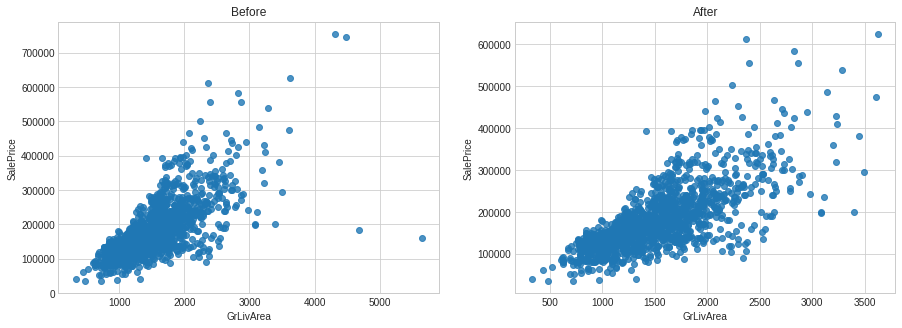

In [15]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
g = sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], fit_reg=False).set_title("Before")

# Delete outliers
plt.subplot(1, 2, 2)                                                                                
train = train.drop(train[(train['GrLivArea']>4000)].index)
g = sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], fit_reg=False).set_title("After")

I'm going to transform some numerical variables into strings because they are really categorical variables. If I keep them numeric, then the model will treat them as continuous variables.

In [16]:
# MSSubClass: Identifies the type of dwelling involved in the sale.
all['MSSubClass'] = all['MSSubClass'].apply(str)


# OverallCond: Rates the overall condition of the house
all['OverallCond'] = all['OverallCond'].astype(str)


# Year (YYYY) and month (MM) sold are transformed into categorical features.
all['YrSold'] = all['YrSold'].astype(str)
all['MoSold'] = all['MoSold'].astype(str)

# GarageYrBlt: Year garage was built
all['GarageYrBlt'] = all['GarageYrBlt'].astype(str)



***

<a id='treat_missing_values'></a>
### 3.2 - Treat missing values

I want to visualize the missing values in my data.

Text(0.5, 1.0, 'Percent missing data by feature')

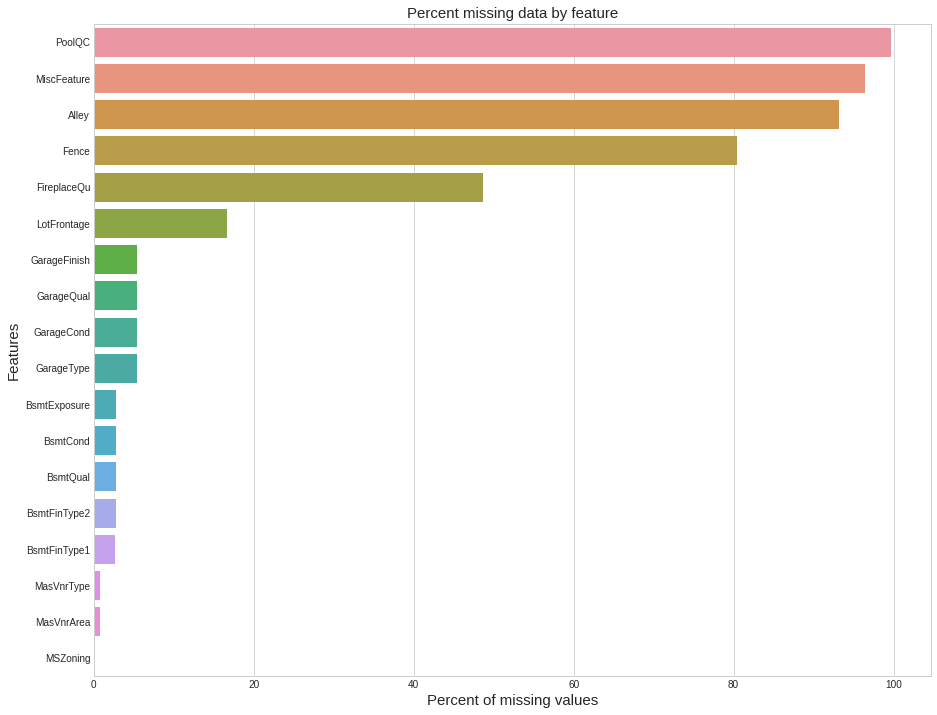

In [17]:
all_na = (all.isnull().sum() / len(all)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)[:18]
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks()
sns.barplot(x=all_na, y=all_na.index, orient="h")
plt.xlabel('Percent of missing values', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

I want a more detailed look at my missing values.

In [18]:
total = all.isnull().sum().sort_values(ascending=False)
percent = (all.isnull().sum()/all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Percent']>0]

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageFinish,159,0.054471
GarageType,157,0.053786


The following cells are imputations of the missing values. 
When a variable does not have it's respective feature, I used "None" value  for categorical features and "0" for numerical features. This is because N/A does not work for some computations and models.
"Data Description Text file" is abbreviated to DDTF. 

**PoolQC**: DDTF says NA means "No Pool". This makes sense as most homes probably do not have pools.

In [19]:
all["PoolQC"] = all["PoolQC"].fillna("None")

**MiscFeature**: DDTF says NA means "no misc feature". 

In [20]:
all["MiscFeature"] = all["MiscFeature"].fillna("None")

**Alley**: DDTF says NA means "no alley access".

In [21]:
all["Alley"] = all["Alley"].fillna("None")

**Fence**: DDTF data description says NA means "no fence".

In [22]:
all["Fence"] = all["Fence"].fillna("None")

**FireplaceQu**: DDTF says NA means "no fireplace".

In [23]:
all["FireplaceQu"] = all["FireplaceQu"].fillna("None")

**LotFrontage**: I imputed using the median as the area of the connecting street, to the property, should be similar to other homes in it's neighborhood. 

In [24]:
all["LotFrontage"] = all.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

**GarageType, GarageFinish, GarageQual, GarageCond**: Replaced missing data with None as NA means "no garage".

In [25]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all[col] = all[col].fillna('None')

**GarageYrBlt, GarageArea and GarageCars**: I replace the missing data with 0 because no garage = no cars. 

HOWEVER, I will keep GarageYrBlt in mind as imputing with a year of 0 does not make sense.

In [26]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all[col] = all[col].fillna(0)

**BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath**: missing values are likely 0 for having no basement.


In [27]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all[col] = all[col].fillna(0)

**BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2**: For all these categorical basement-related features, NaN means no basement.

In [28]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all[col] = all[col].fillna('None')

**MasVnrArea and MasVnrType**: I'll fill in None for no masonry veneer and 0 for the area. However, I still disagree with this.

In [29]:
all["MasVnrType"] = all["MasVnrType"].fillna("None")
all["MasVnrArea"] = all["MasVnrArea"].fillna(0)

**MSZoning (The general zoning classification)**: 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [30]:
all['MSZoning'] = all['MSZoning'].fillna(all['MSZoning'].mode()[0])

**Functional**: DDTF says NA means typical (Typ) which is also the mode. Thus, if it's missing values it is most probably 'Typ.'

In [31]:
all["Functional"] = all["Functional"].fillna("Typ")

**Electrical**: Electrical only has one NA value so I imputed using the Mode.

In [32]:
all['Electrical'] = all['Electrical'].fillna(all['Electrical'].mode()[0])

**KitchenQual**: It has only one NA value, and like Electrical, we set it to the mode which is TA for Typical/Average.

In [33]:
all['KitchenQual'] = all['KitchenQual'].fillna(all['KitchenQual'].mode()[0])

**Exterior1st and Exterior2nd**: Both Exterior 1 and 2 only have 1 missing value and I will just impute it using the mode.

In [34]:
all['Exterior1st'] = all['Exterior1st'].fillna(all['Exterior1st'].mode()[0])
all['Exterior2nd'] = all['Exterior2nd'].fillna(all['Exterior2nd'].mode()[0])

**SaleType**: I will fill using it's most common value which is WD for Warranty Deed - Conventional

In [35]:
all['SaleType'] = all['SaleType'].fillna(all['SaleType'].mode()[0])

**MSSubClass**: This identifies the type of dwelling involved in the sale, and I will impute using the mode. 

In [36]:
all['MSSubClass'] = all['MSSubClass'].fillna(all['MSSubClass'].mode()[0])

**Utilities**: For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA. However, because the Test dataset has only 1 value for this column, and it is constant, it holds no predictive power. I'll drop this column.

In [37]:
# From inspection, we can remove Utilities
all = all.drop(['Utilities'], axis=1)

all_na = all.isnull().sum()
print("Features with missing values: ", len(all_na.drop(all_na[all_na == 0].index)))

Features with missing values:  0


Are there any remaining missing values?

In [38]:
total = all.isnull().sum().sort_values(ascending=False)
percent = (all.isnull().sum()/all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Percent']>0]
all_data_na = all.isnull().sum()
print("Features with missing values: ", len(all_data_na.drop(all_data_na[all_data_na == 0].index)))

Features with missing values:  0


Are there any duplicate rows?

In [39]:
duplicateRowsDF = all[all.duplicated()]
duplicateRowsDF

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2713,160,FV,24.0,2544,Pave,Pave,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,7,5,2005,2005,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,600.0,600.0,GasA,Ex,Y,SBrkr,520,623,80,1223,0.0,0.0,2,1,2,1,Gd,4,Typ,0,None,Detchd,2005.0,RFn,2.0,480.0,TA,TA,Y,0,166,0,0,0,0,None,None,None,0,7,2006,WD,Normal
2865,160,RM,24.0,2522,Pave,None,Reg,Lvl,Inside,Gtl,Edwards,Norm,Norm,Twnhs,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,Stone,50.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,970.0,970.0,GasA,Ex,Y,SBrkr,970,739,0,1709,0.0,0.0,2,0,3,1,Gd,7,Maj1,0,None,Detchd,2004.0,Unf,2.0,380.0,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,5,2006,WD,Normal


There are no duplicate rows. 

***

<a id='exploratory_data_analysis'></a>
# 4. 
## Exploratory Data Analysis

<a id='correlation_matrix'></a>
### 4.1 - Correlation matrix

Sale Price is our target variable. I want to see the distribution.

I want to see a general overview of the correlated features.

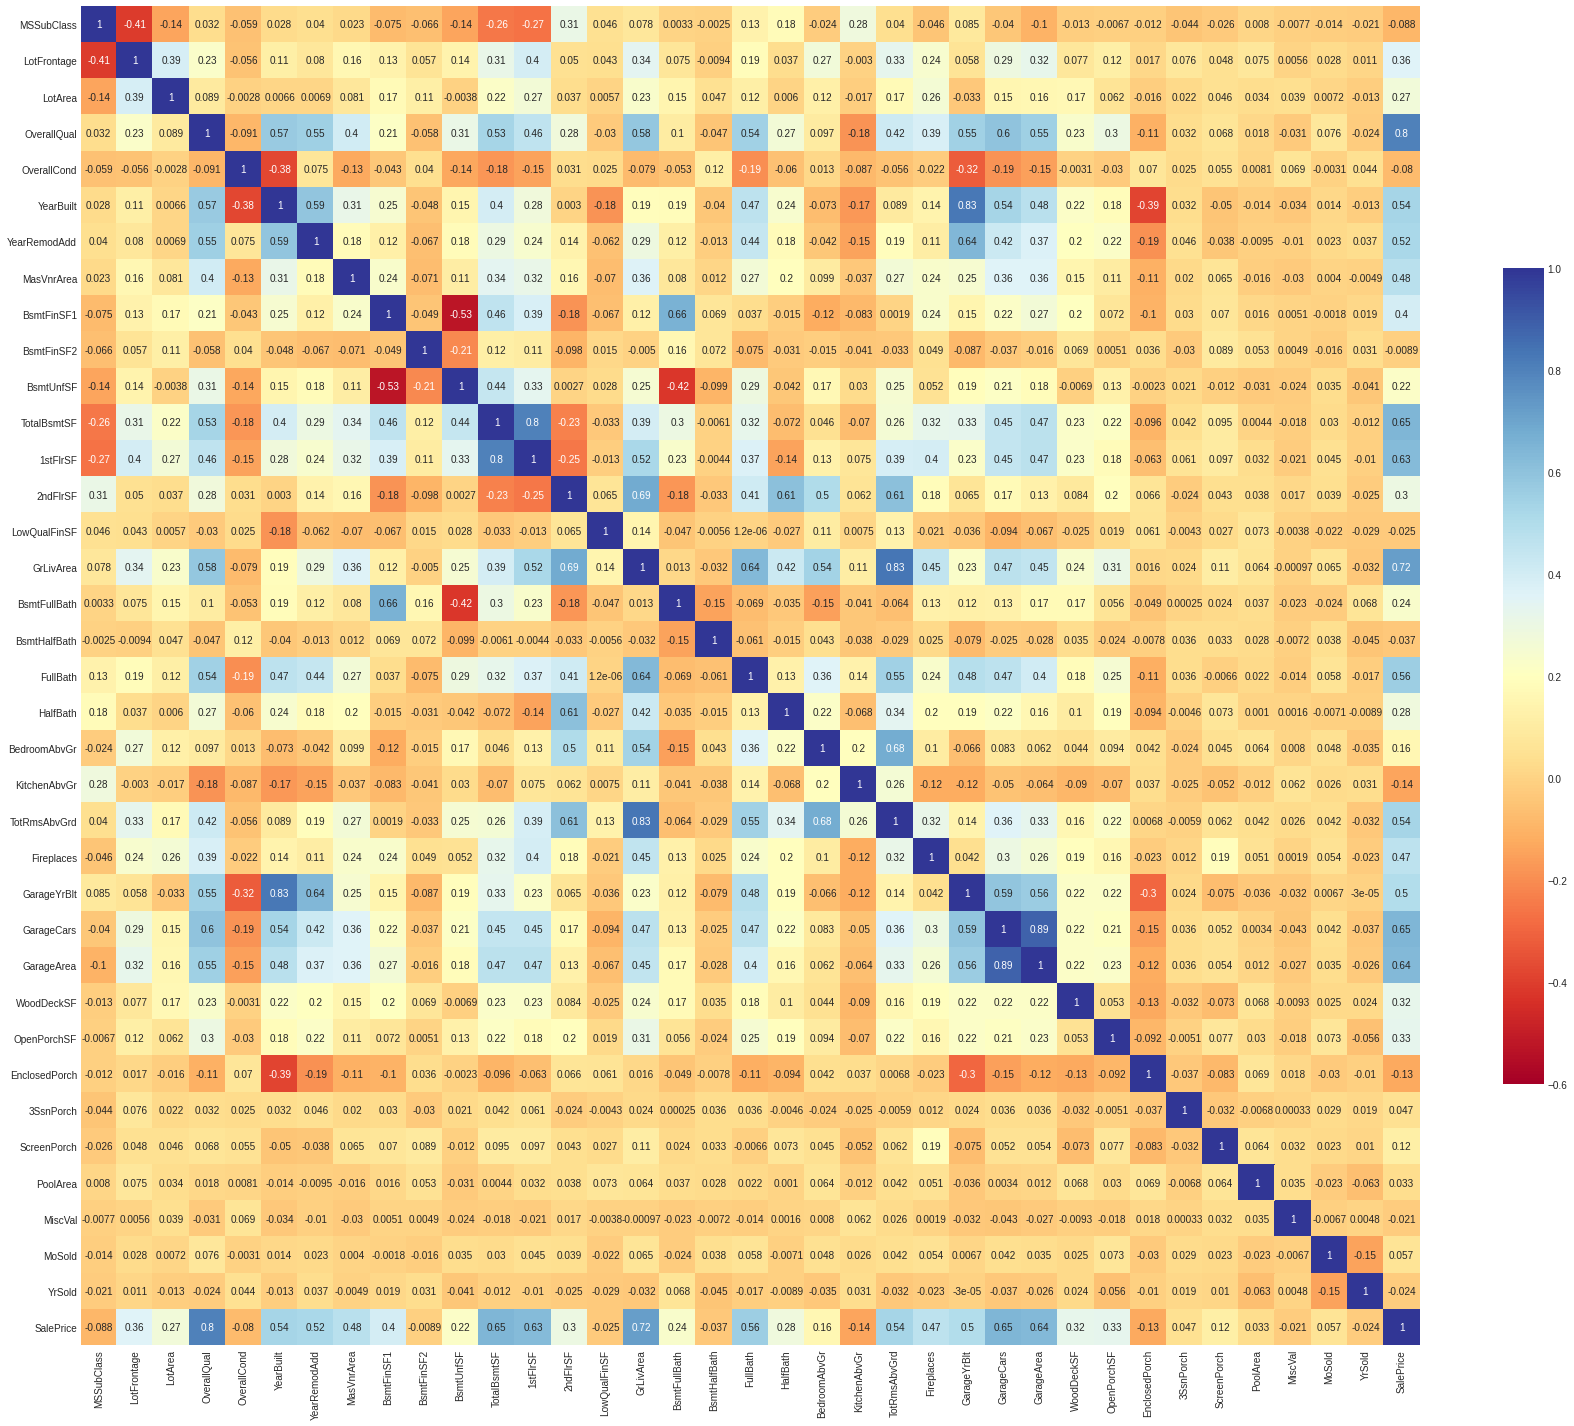

In [40]:
corr = train.corr()
plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True);

In [41]:
#correlation matrix
# corrmat = train.corr()
# f, ax = plt.subplots(figsize=(25, 15))
# sns.heatmap(corrmat, vmax=.8, annot=True);

Generally speaking, a Pearson Correlation Coefficient of .5 is moderately positive. I'll filter the features by that metric.
![](http://intranet.tdmu.edu.ua/data/kafedra/internal/distance/classes_stud/english/1course/Medical%20statistics/08.%20Types%20of%20correlation.files/image013.gif)

[Text(0, 0.5, 'OverallQual'),
 Text(0, 1.5, 'YearBuilt'),
 Text(0, 2.5, 'YearRemodAdd'),
 Text(0, 3.5, 'TotalBsmtSF'),
 Text(0, 4.5, '1stFlrSF'),
 Text(0, 5.5, 'GrLivArea'),
 Text(0, 6.5, 'FullBath'),
 Text(0, 7.5, 'TotRmsAbvGrd'),
 Text(0, 8.5, 'GarageCars'),
 Text(0, 9.5, 'GarageArea'),
 Text(0, 10.5, 'SalePrice')]

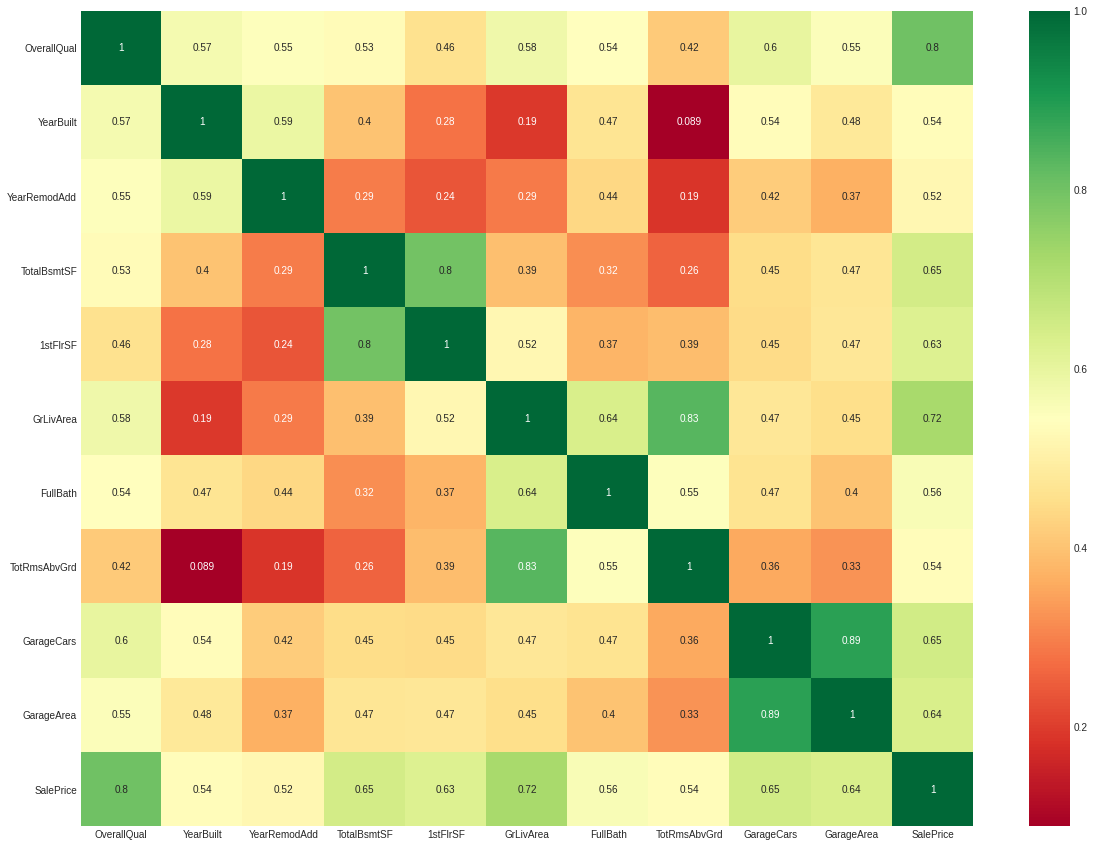

In [42]:
# most correlated features
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(20,15))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")
g.set_yticklabels(g.get_yticklabels(), rotation=360)

***

<a id='feature_engineering'></a>
### 4.2 - Feature engineering

This section is quite lengthy, so I have added hyperlinks to each subsection below in case you want to skip through...

- 4.2.1 - [Polynomials](#polynomials)
- 4.2.2 - [Interior](#interior)
- 4.2.3 - [Architectural & Structural](#architectural_&_structural)
- 4.2.4 - [Exterior](#exterior)
- 4.2.5 - [Location](#location)
- 4.2.6 - [Land](#land)
- 4.2.7 - [Access](#access)
- 4.2.8 - [Utilities](#utilities)
- 4.2.9 - [Miscellaneous](#miscellaneous)

<a id='polynomials'></a>
#### 4.2.1 - Polynomials

The most common relationship we may think of between two variables, would be a straight line or a linear relationship. What this means is that if we increase the predictor by 1 unit, the response always increases by X units. However, not all data has a linear relationship and therefore it may be necessary for your model to fit the more complex relationships in the data. 

But how do you fit a model to data with complex relationships, unexplainable by a linear function? There are a variety of curve-fitting methods you can choose from to help you with this.

- The most common way to fit curves to the data is to include polynomial terms, such as squared or cubed predictors.
- Typically, you choose the model order by the number of bends you need in your line. Each increase in the exponent produces one more bend in the curved fitted line. It’s very rare to use more than a cubic term.

Using the correlation matrix, the top influencing factors that I will use to create polynomials are:
1. **OverallQual**
2. **GrLivArea**
3. **GarageCars**
4. **GarageArea**
5. **TotalBsmtSF**
6. **1stFlrSF**
7. **FullBath**
8. **TotRmsAbvGrd**
9. **YearBuilt**
10. **YearRemodAdd**


In [43]:
# Quadratic
all["OverallQual-2"] = all["OverallQual"] ** 2
all["GrLivArea-2"] = all["GrLivArea"] ** 2
all["GarageCars-2"] = all["GarageCars"] ** 2
all["GarageArea-2"] = all["GarageArea"] ** 2
all["TotalBsmtSF-2"] = all["TotalBsmtSF"] ** 2
all["1stFlrSF-2"] = all["1stFlrSF"] ** 2
all["FullBath-2"] = all["FullBath"] ** 2
all["TotRmsAbvGrd-2"] = all["TotRmsAbvGrd"] ** 2
all["YearBuilt-2"] = all["YearBuilt"] ** 2
all["YearRemodAdd-2"] = all["YearRemodAdd"] ** 2
print("Quadratics done!...")

# Cubic
all["OverallQual-3"] = all["OverallQual"] ** 3
all["GrLivArea-3"] = all["GrLivArea"] ** 3
all["GarageCars-3"] = all["GarageCars"] ** 3
all["GarageArea-3"] = all["GarageArea"] ** 3
all["TotalBsmtSF-3"] = all["TotalBsmtSF"] ** 3
all["1stFlrSF-3"] = all["1stFlrSF"] ** 3
all["FullBath-3"] = all["FullBath"] ** 3
all["TotRmsAbvGrd-3"] = all["TotRmsAbvGrd"] ** 3
all["YearBuilt-3"] = all["YearBuilt"] ** 3
all["YearRemodAdd-3"] = all["YearRemodAdd"] ** 3
print("Cubics done!...")

# Square Root
all["OverallQual-Sq"] = np.sqrt(all["OverallQual"])
all["GrLivArea-Sq"] = np.sqrt(all["GrLivArea"])
all["GarageCars-Sq"] = np.sqrt(all["GarageCars"])
all["GarageArea-Sq"] = np.sqrt(all["GarageArea"])
all["TotalBsmtSF-Sq"] = np.sqrt(all["TotalBsmtSF"])
all["1stFlrSF-Sq"] = np.sqrt(all["1stFlrSF"])
all["FullBath-Sq"] = np.sqrt(all["FullBath"])
all["TotRmsAbvGrd-Sq"] = np.sqrt(all["TotRmsAbvGrd"])
all["YearBuilt-Sq"] = np.sqrt(all["YearBuilt"])
all["YearRemodAdd-Sq"] = np.sqrt(all["YearRemodAdd"])
print("Roots done!...")
print('\n', '-' * 136)
print(all.shape)

Quadratics done!...
Cubics done!...
Roots done!...

 ----------------------------------------------------------------------------------------------------------------------------------------
(2919, 108)


<a id='interior'></a>
#### 4.2.2 - Interior

***BsmtQual***

- Evaluates the height of the basement.
       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches)
       NA	No Basement

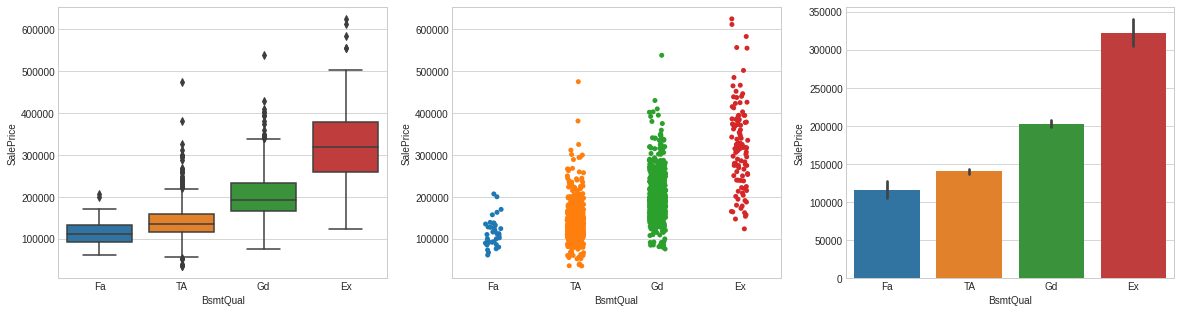

In [44]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtQual", y="SalePrice", data=train, order=['Fa', 'TA', 'Gd', 'Ex']);

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtQual", y="SalePrice", data=train, size = 5, jitter = True, order=['Fa', 'TA', 'Gd', 'Ex']);

plt.subplot(1, 3, 3)
sns.barplot(x="BsmtQual", y="SalePrice", data=train, order=['Fa', 'TA', 'Gd', 'Ex']);

SalePrice is clearly affected by BsmtQual with higher quality commanding a higher price. Since this feature is ordinal, I'll encode it myself.

In [45]:
all['BsmtQual'] = all['BsmtQual'].map({"None":0, "Fa":1, "TA":2, "Gd":3, "Ex":4})
print(all.shape)
print('\n', '-' * 136)
all['BsmtQual'].unique()

(2919, 108)

 ----------------------------------------------------------------------------------------------------------------------------------------


array([3, 2, 4, 0, 1])

***BsmtCond***
- Evaluates the general condition of the basement.
       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

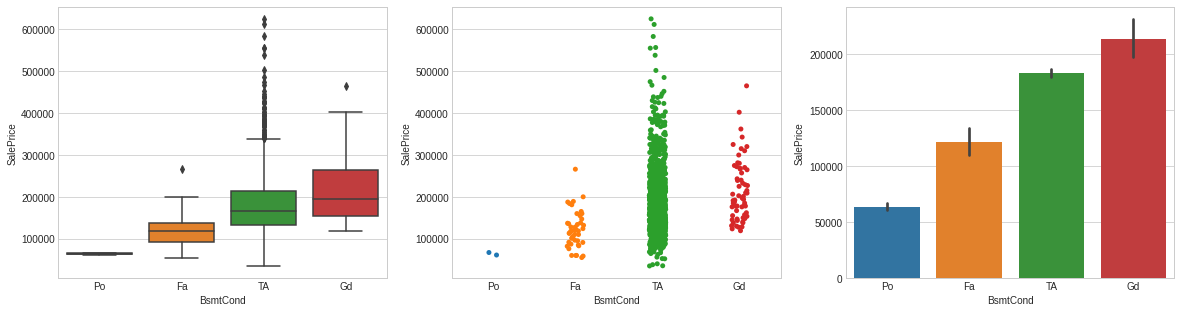

In [46]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtCond", y="SalePrice", data=train, order=['Po', 'Fa', 'TA', 'Gd']);

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtCond", y="SalePrice", data=train, size = 5, jitter = True, order=['Po', 'Fa', 'TA', 'Gd']);

plt.subplot(1, 3, 3)
sns.barplot(x="BsmtCond", y="SalePrice", data=train, order=['Po', 'Fa', 'TA', 'Gd']);

As basement quality improves, Saleprice increases. However, we see some very high prices in the "typical" category, while also being where the majority of data lies. This is an ordinal feature so I will replace by hand.

In [47]:
all['BsmtCond'] = all['BsmtCond'].map({"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
print(all.shape)
print('\n', '-' * 136)
all['BsmtCond'].unique()

(2919, 108)

 ----------------------------------------------------------------------------------------------------------------------------------------


array([3, 4, 0, 2, 1])

***BsmtExposure***
- Refers to walkout or garden level walls
       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

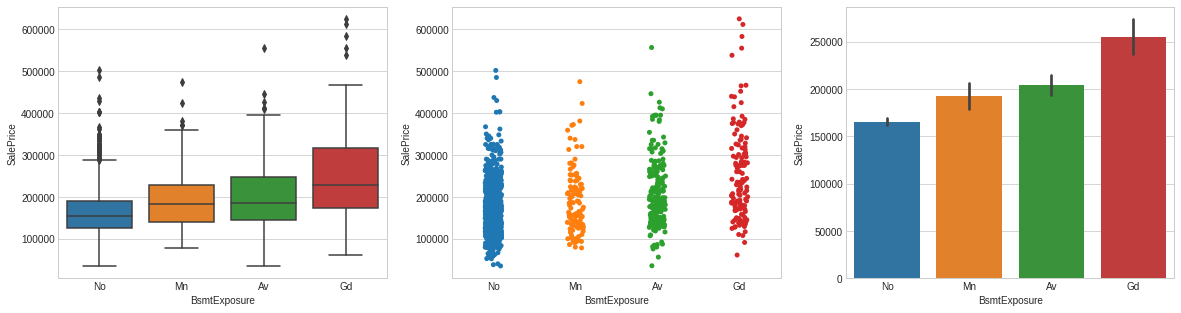

In [48]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtExposure", y="SalePrice", data=train, order=['No', 'Mn', 'Av', 'Gd']);

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtExposure", y="SalePrice", data=train, size = 5, jitter = True, order=['No', 'Mn', 'Av', 'Gd']);

plt.subplot(1, 3, 3)
sns.barplot(x="BsmtExposure", y="SalePrice", data=train, order=['No', 'Mn', 'Av', 'Gd']);

SalePrice slightly increases as the amount of exposure increases. However, the average price between categories doesn't have much difference. Because these are ordinal, I will replace these values by hand. 

***BsmtFinType1***
- Rating of basement finished area
       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

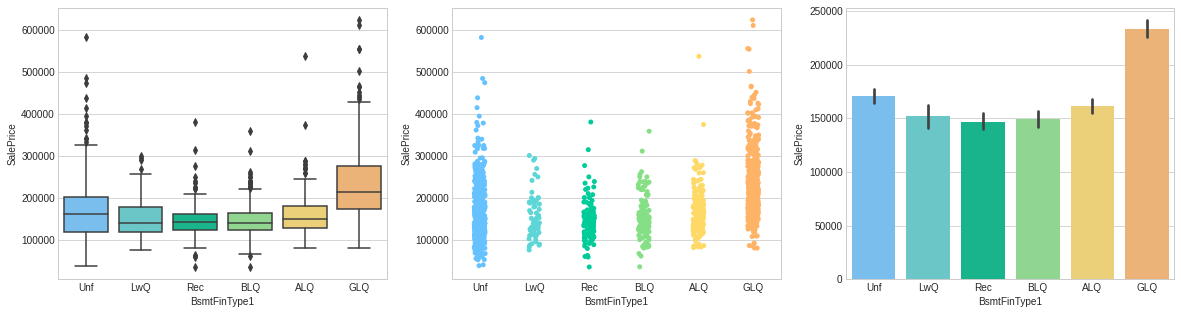

In [49]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtFinType1", y="SalePrice", data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtFinType1", y="SalePrice", data=train, size = 5, jitter = True, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="BsmtFinType1", y="SalePrice", data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = mycols);

This is interesting as houses with an unfinished basement tended to have an average SalePrice higher than all finished basements except the highest quality finished basement. This is supposed to be an ordinal feature, but because SalePrice does not increase amongst all categories, I will creae dummy variables instead.

In [50]:
all = pd.get_dummies(all, columns = ["BsmtFinType1"], prefix="BsmtFinType1")
print(all.shape)
print('\n', '-' * 136)
all.head(3)

(2919, 114)

 ----------------------------------------------------------------------------------------------------------------------------------------


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,...,MoSold,YrSold,SaleType,SaleCondition,OverallQual-2,GrLivArea-2,GarageCars-2,GarageArea-2,TotalBsmtSF-2,1stFlrSF-2,FullBath-2,TotRmsAbvGrd-2,YearBuilt-2,YearRemodAdd-2,OverallQual-3,GrLivArea-3,GarageCars-3,GarageArea-3,TotalBsmtSF-3,1stFlrSF-3,FullBath-3,TotRmsAbvGrd-3,YearBuilt-3,YearRemodAdd-3,OverallQual-Sq,GrLivArea-Sq,GarageCars-Sq,GarageArea-Sq,TotalBsmtSF-Sq,1stFlrSF-Sq,FullBath-Sq,TotRmsAbvGrd-Sq,YearBuilt-Sq,YearRemodAdd-Sq,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,3,3,No,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,...,2,2008,WD,Normal,49,2924100,4.0,300304.0,732736.0,732736,4,64,4012009,4012009,343,5000211000,8.0,164566592.0,6.272220e+08,627222016,8,512,8036054027,8036054027,2.645751,41.352146,1.414214,23.409400,29.257478,29.257478,1.414214,2.828427,44.754888,44.754888,0,0,1,0,0,0,0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,3,3,Gd,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,...,5,2007,WD,Normal,36,1592644,4.0,211600.0,1592644.0,1592644,4,36,3904576,3904576,216,2009916728,8.0,97336000.0,2.009917e+09,2009916728,8,216,7715442176,7715442176,2.449490,35.524639,1.414214,21.447611,35.524639,35.524639,1.414214,2.449490,44.452222,44.452222,1,0,0,0,0,0,0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,3,3,Mn,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,...,9,2008,WD,Normal,49,3189796,4.0,369664.0,846400.0,846400,4,36,4004001,4008004,343,5696975656,8.0,224755712.0,7.786880e+08,778688000,8,216,8012006001,8024024008,2.645751,42.261093,1.414214,24.657656,30.331502,30.331502,1.414214,2.449490,44.732538,44.743715,0,0,1,0,0,0,0


***BsmtFinSF1***
- Type 1 finished square feet.

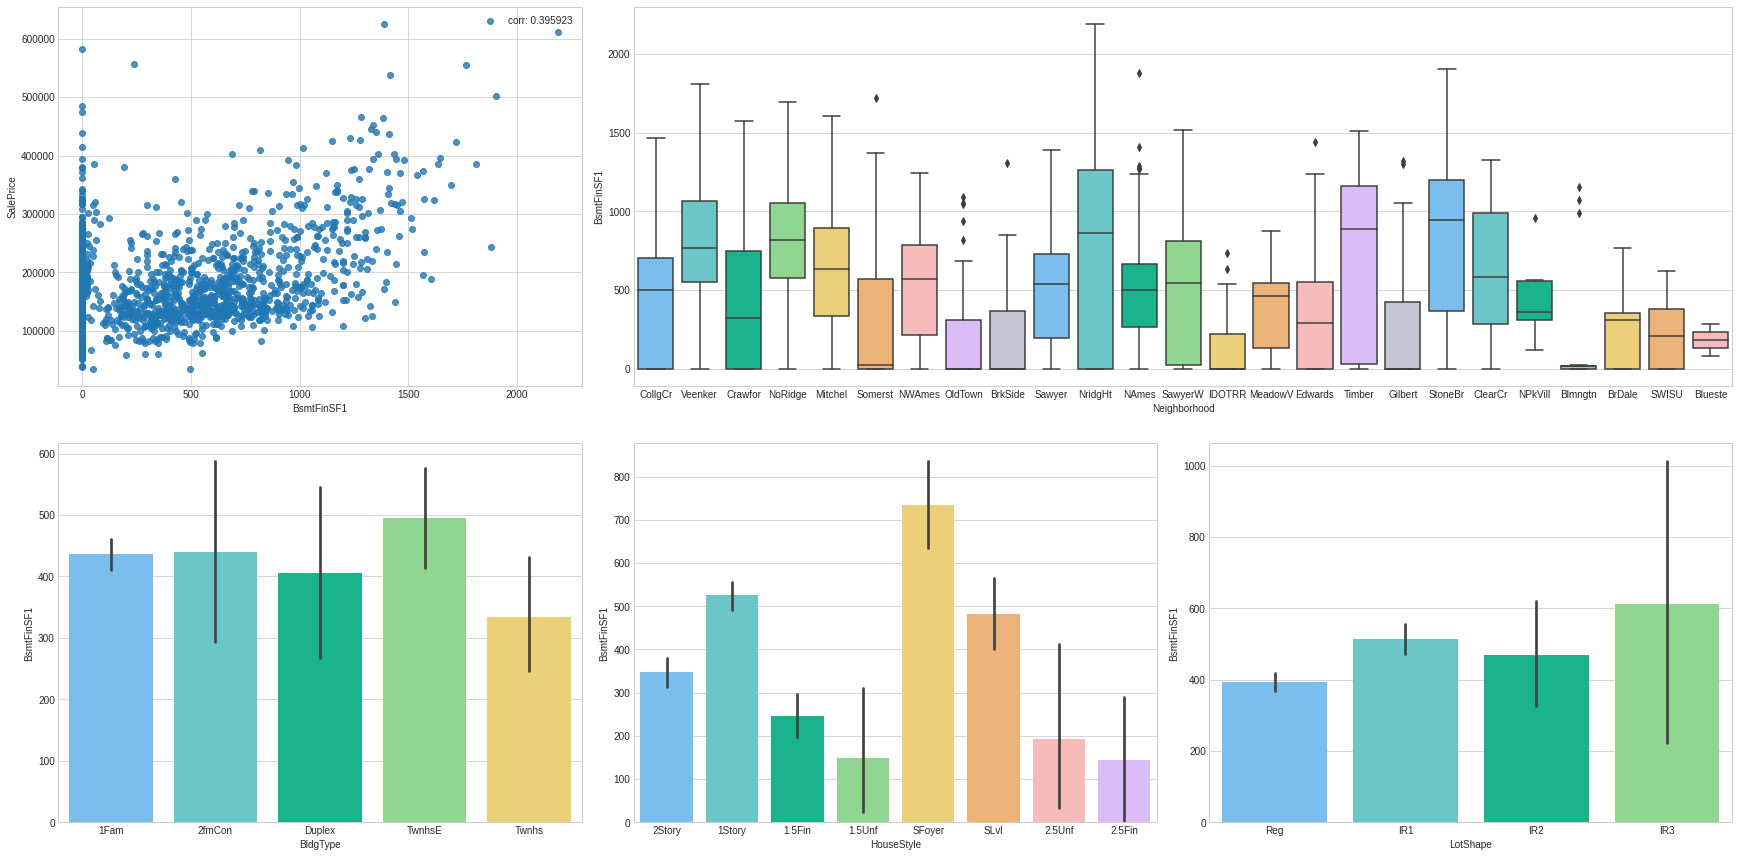

In [51]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['BsmtFinSF1'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['BsmtFinSF1'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="BsmtFinSF1", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="BsmtFinSF1", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="BsmtFinSF1", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="BsmtFinSF1", data=train, palette = mycols);


The reason for binning continuous features: [Binning](https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b)

BsmtFinSF1 has a positive correlation with SalePrice but the spread of the data is huge and varies depending on Neighborhood, BldgType, HouseStyle, and LotShape. I will bin this data into four quantiles.

In [52]:
all['BsmtFinSF1_Band'] = pd.cut(all['BsmtFinSF1'], 4)
all['BsmtFinSF1_Band'].unique()

[(-5.644, 1411.0], (1411.0, 2822.0], (4233.0, 5644.0], (2822.0, 4233.0]]
Categories (4, interval[float64]): [(-5.644, 1411.0] < (1411.0, 2822.0] < (2822.0, 4233.0] <
                                    (4233.0, 5644.0]]

In [53]:
all.loc[all['BsmtFinSF1']<=1002.5, 'BsmtFinSF1'] = 1
all.loc[(all['BsmtFinSF1']>1002.5) & (all['BsmtFinSF1']<=2005), 'BsmtFinSF1'] = 2
all.loc[(all['BsmtFinSF1']>2005) & (all['BsmtFinSF1']<=3007.5), 'BsmtFinSF1'] = 3
all.loc[all['BsmtFinSF1']>3007.5, 'BsmtFinSF1'] = 4
all['BsmtFinSF1'] = all['BsmtFinSF1'].astype(int)

all.drop('BsmtFinSF1_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["BsmtFinSF1"], prefix="BsmtFinSF1")
all.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,...,OverallQual-2,GrLivArea-2,GarageCars-2,GarageArea-2,TotalBsmtSF-2,1stFlrSF-2,FullBath-2,TotRmsAbvGrd-2,YearBuilt-2,YearRemodAdd-2,OverallQual-3,GrLivArea-3,GarageCars-3,GarageArea-3,TotalBsmtSF-3,1stFlrSF-3,FullBath-3,TotRmsAbvGrd-3,YearBuilt-3,YearRemodAdd-3,OverallQual-Sq,GrLivArea-Sq,GarageCars-Sq,GarageArea-Sq,TotalBsmtSF-Sq,1stFlrSF-Sq,FullBath-Sq,TotRmsAbvGrd-Sq,YearBuilt-Sq,YearRemodAdd-Sq,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinSF1_1,BsmtFinSF1_2,BsmtFinSF1_3,BsmtFinSF1_4
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,3,3,No,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,...,49,2924100,4.0,300304.0,732736.0,732736,4,64,4012009,4012009,343,5000211000,8.0,164566592.0,6.272220e+08,627222016,8,512,8036054027,8036054027,2.645751,41.352146,1.414214,23.409400,29.257478,29.257478,1.414214,2.828427,44.754888,44.754888,0,0,1,0,0,0,0,1,0,0,0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,3,3,Gd,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,...,36,1592644,4.0,211600.0,1592644.0,1592644,4,36,3904576,3904576,216,2009916728,8.0,97336000.0,2.009917e+09,2009916728,8,216,7715442176,7715442176,2.449490,35.524639,1.414214,21.447611,35.524639,35.524639,1.414214,2.449490,44.452222,44.452222,1,0,0,0,0,0,0,1,0,0,0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,3,3,Mn,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,...,49,3189796,4.0,369664.0,846400.0,846400,4,36,4004001,4008004,343,5696975656,8.0,224755712.0,7.786880e+08,778688000,8,216,8012006001,8024024008,2.645751,42.261093,1.414214,24.657656,30.331502,30.331502,1.414214,2.449490,44.732538,44.743715,0,0,1,0,0,0,0,1,0,0,0


***BsmtFinType2***
- Rating of basement finished area (if multiple types)
BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

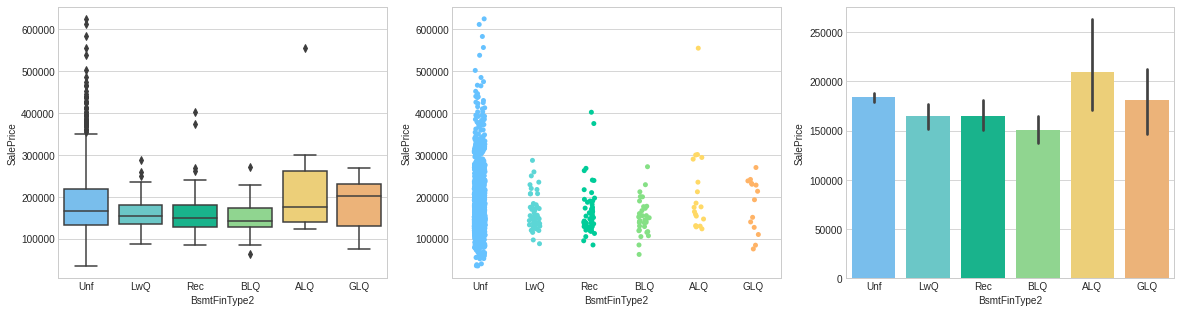

In [54]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtFinType2", y="SalePrice", data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtFinType2", y="SalePrice", data=train, size = 5, jitter = True, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="BsmtFinType2", y="SalePrice", data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = mycols);

Most of the houses have unfinished second basements, and relatively few for the other categories. Although, this is meant to be an ordinal feature, I will create dummy variables.

In [56]:
all = pd.get_dummies(all, columns = ["BsmtFinType2"], prefix="BsmtFinType2")
all.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,...,TotRmsAbvGrd-2,YearBuilt-2,YearRemodAdd-2,OverallQual-3,GrLivArea-3,GarageCars-3,GarageArea-3,TotalBsmtSF-3,1stFlrSF-3,FullBath-3,TotRmsAbvGrd-3,YearBuilt-3,YearRemodAdd-3,OverallQual-Sq,GrLivArea-Sq,GarageCars-Sq,GarageArea-Sq,TotalBsmtSF-Sq,1stFlrSF-Sq,FullBath-Sq,TotRmsAbvGrd-Sq,YearBuilt-Sq,YearRemodAdd-Sq,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinSF1_1,BsmtFinSF1_2,BsmtFinSF1_3,BsmtFinSF1_4,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,3,3,No,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,...,64,4012009,4012009,343,5000211000,8.0,164566592.0,6.272220e+08,627222016,8,512,8036054027,8036054027,2.645751,41.352146,1.414214,23.409400,29.257478,29.257478,1.414214,2.828427,44.754888,44.754888,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,3,3,Gd,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,...,36,3904576,3904576,216,2009916728,8.0,97336000.0,2.009917e+09,2009916728,8,216,7715442176,7715442176,2.449490,35.524639,1.414214,21.447611,35.524639,35.524639,1.414214,2.449490,44.452222,44.452222,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,3,3,Mn,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,...,36,4004001,4008004,343,5696975656,8.0,224755712.0,7.786880e+08,778688000,8,216,8012006001,8024024008,2.645751,42.261093,1.414214,24.657656,30.331502,30.331502,1.414214,2.449490,44.732538,44.743715,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


***BsmtFinSF2***
- Type 2 finished square feet.

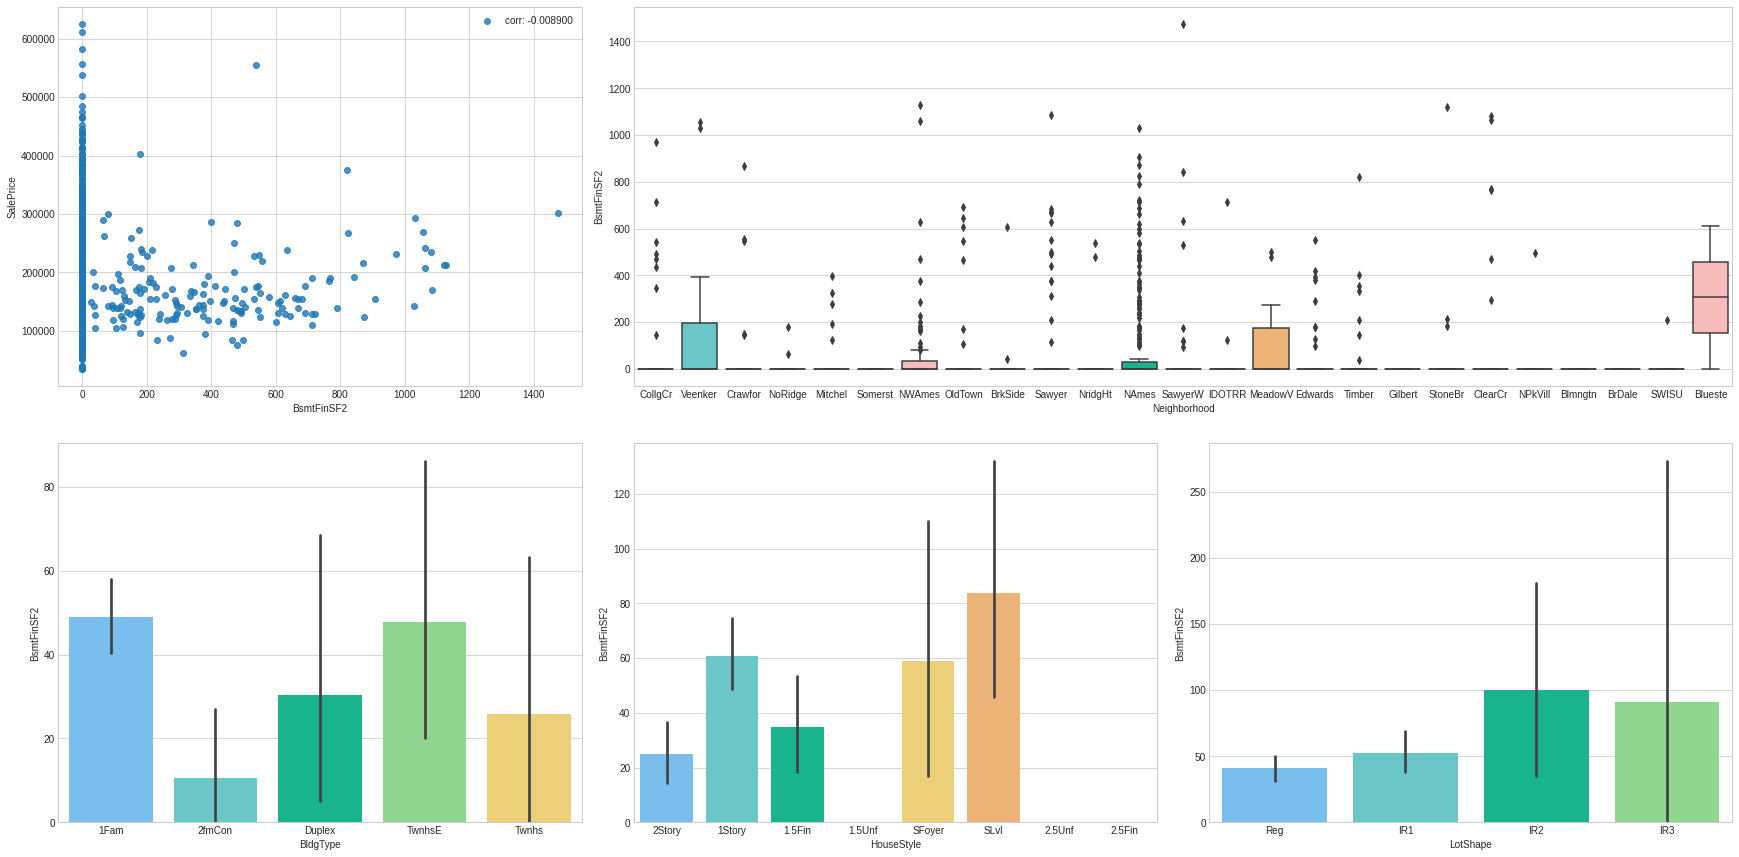

In [57]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['BsmtFinSF2'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['BsmtFinSF2'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="BsmtFinSF2", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="BsmtFinSF2", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="BsmtFinSF2", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="BsmtFinSF2", data=train, palette = mycols);

Most of the values, for this feature, are zero. There does not seem to be a significant correlation, so I will flag this variable.

In [59]:
all['BsmtFinSf2_Flag'] = all['BsmtFinSF2'].map(lambda x:0 if x==0 else 1)
all.drop('BsmtFinSF2', axis=1, inplace=True)

***BsmtUnfSF***
- Unfinished square feet of basement area

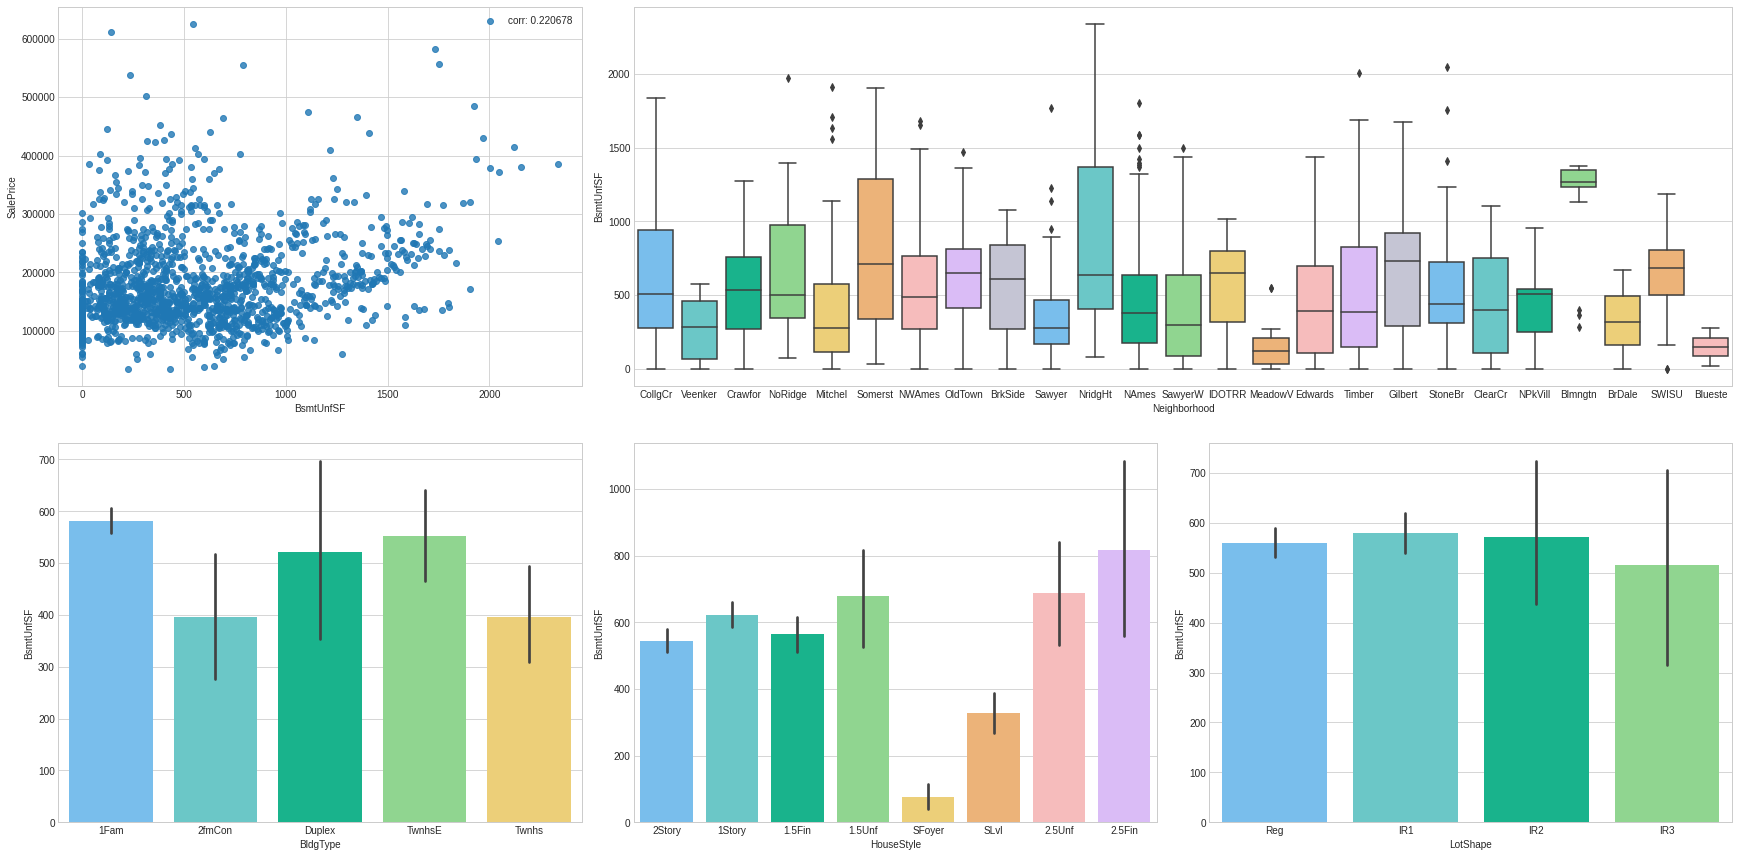

In [60]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['BsmtUnfSF'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['BsmtUnfSF'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="BsmtUnfSF", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="BsmtUnfSF", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="BsmtUnfSF", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="BsmtUnfSF", data=train, palette = mycols);

This feature has positive correlation with SalePrice, with a proportion of data points equaling zero. The amount of square feet varies widely based on location and style, but is fairly consistent across lot shapes. I will create three bins.

In [61]:
all['BsmtUnfSF_Band'] = pd.cut(all['BsmtUnfSF'], 3)
all['BsmtUnfSF_Band'].unique()

[(-2.336, 778.667], (778.667, 1557.333], (1557.333, 2336.0]]
Categories (3, interval[float64]): [(-2.336, 778.667] < (778.667, 1557.333] < (1557.333, 2336.0]]

In [62]:
all.loc[all['BsmtUnfSF']<=778.667, 'BsmtUnfSF'] = 1
all.loc[(all['BsmtUnfSF']>778.667) & (all['BsmtUnfSF']<=1557.333), 'BsmtUnfSF'] = 2
all.loc[all['BsmtUnfSF']>1557.333, 'BsmtUnfSF'] = 3
all['BsmtUnfSF'] = all['BsmtUnfSF'].astype(int)

all.drop('BsmtUnfSF_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["BsmtUnfSF"], prefix="BsmtUnfSF")
all.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,GrLivArea-3,GarageCars-3,GarageArea-3,TotalBsmtSF-3,1stFlrSF-3,FullBath-3,TotRmsAbvGrd-3,YearBuilt-3,YearRemodAdd-3,OverallQual-Sq,GrLivArea-Sq,GarageCars-Sq,GarageArea-Sq,TotalBsmtSF-Sq,1stFlrSF-Sq,FullBath-Sq,TotRmsAbvGrd-Sq,YearBuilt-Sq,YearRemodAdd-Sq,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinSF1_1,BsmtFinSF1_2,BsmtFinSF1_3,BsmtFinSF1_4,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinSf2_Flag,BsmtUnfSF_1,BsmtUnfSF_2,BsmtUnfSF_3
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,3,3,No,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,...,5000211000,8.0,164566592.0,6.272220e+08,627222016,8,512,8036054027,8036054027,2.645751,41.352146,1.414214,23.409400,29.257478,29.257478,1.414214,2.828427,44.754888,44.754888,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,3,3,Gd,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,...,2009916728,8.0,97336000.0,2.009917e+09,2009916728,8,216,7715442176,7715442176,2.449490,35.524639,1.414214,21.447611,35.524639,35.524639,1.414214,2.449490,44.452222,44.452222,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,3,3,Mn,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,...,5696975656,8.0,224755712.0,7.786880e+08,778688000,8,216,8012006001,8024024008,2.645751,42.261093,1.414214,24.657656,30.331502,30.331502,1.414214,2.449490,44.732538,44.743715,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0


***TotalBsmtSF***
- Total square feet of basement area.

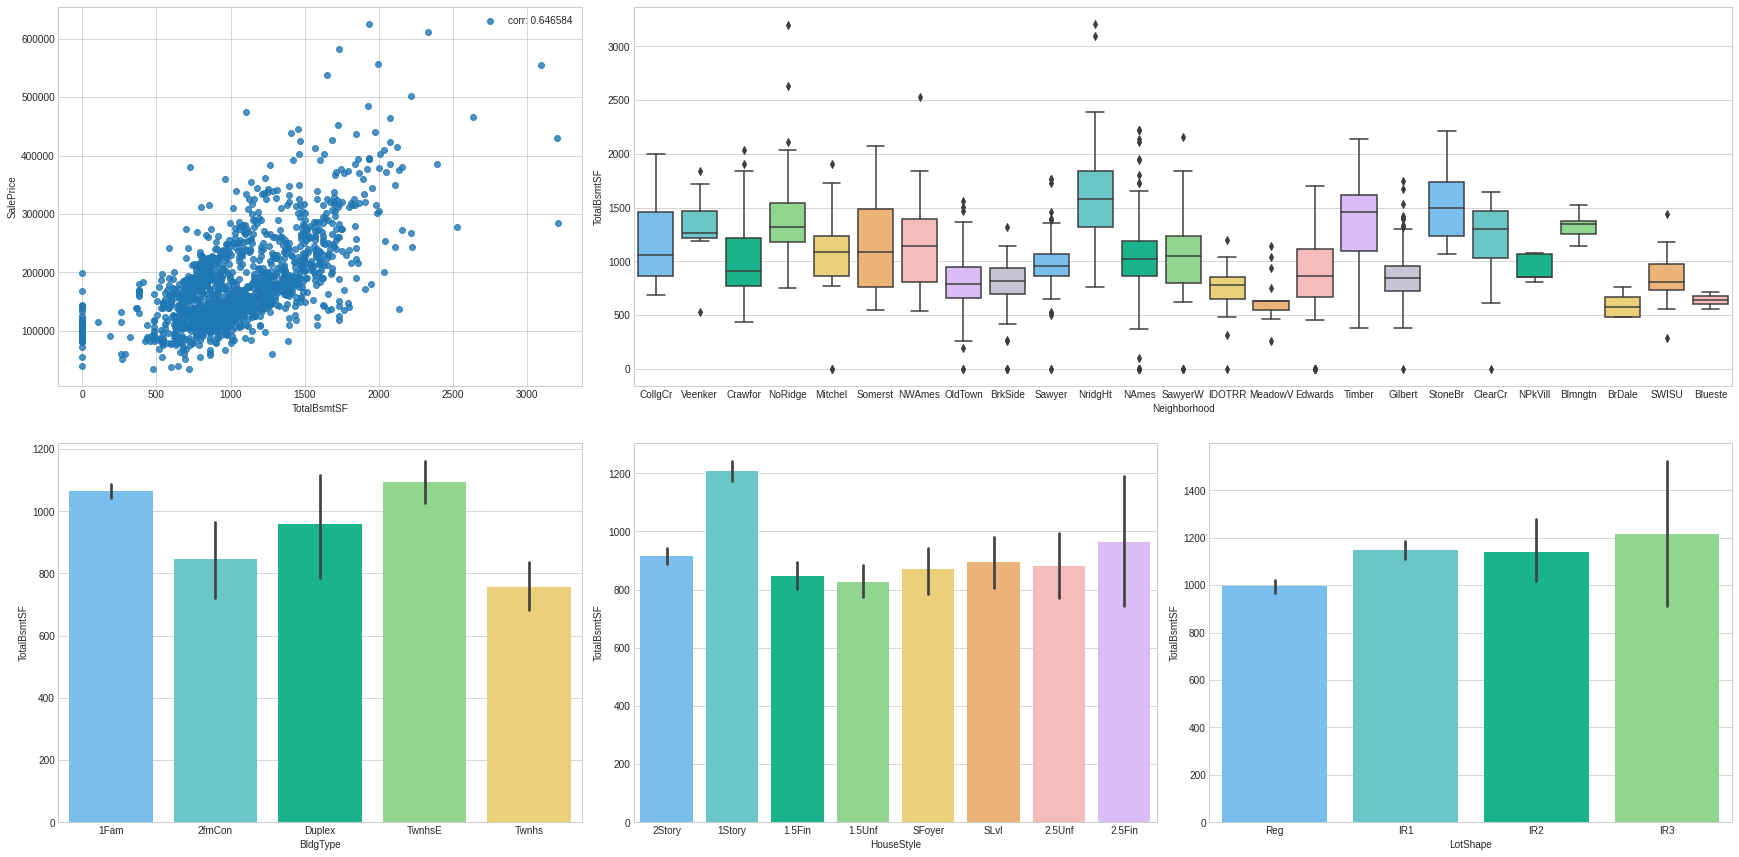

In [63]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['TotalBsmtSF'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['TotalBsmtSF'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="TotalBsmtSF", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="TotalBsmtSF", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="TotalBsmtSF", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="TotalBsmtSF", data=train, palette = mycols);

This feature has a high correlation with Salesprice. It varies widely based on location but less so with type, style, and lot shape. I will cut this continuous variable into ten bins.

- This will be a very important feature within my analysis, due to such a high correlation with Saleprice.
- We can see that it varies widely based on location, however the average basement size has a lower variance based on type, style and lot shape.
- Due to this being a continuous numeric feature and also being a very significant feature when describing SalePrice, I believe there could be more value to be mined within this feature. Hence, I will create some binnings and dummy variables. 

In [64]:
all['TotalBsmtSF_Band'] = pd.cut(all['TotalBsmtSF'], 10)
all['TotalBsmtSF_Band'].unique()

[(611.0, 1222.0], (1222.0, 1833.0], (-6.11, 611.0], (1833.0, 2444.0], (3055.0, 3666.0], (2444.0, 3055.0], (5499.0, 6110.0], (4888.0, 5499.0]]
Categories (8, interval[float64]): [(-6.11, 611.0] < (611.0, 1222.0] < (1222.0, 1833.0] <
                                    (1833.0, 2444.0] < (2444.0, 3055.0] < (3055.0, 3666.0] <
                                    (4888.0, 5499.0] < (5499.0, 6110.0]]

In [65]:
all.loc[all['TotalBsmtSF']<=509.5, 'TotalBsmtSF'] = 1
all.loc[(all['TotalBsmtSF']>509.5) & (all['TotalBsmtSF']<=1019), 'TotalBsmtSF'] = 2
all.loc[(all['TotalBsmtSF']>1019) & (all['TotalBsmtSF']<=1528.5), 'TotalBsmtSF'] = 3
all.loc[(all['TotalBsmtSF']>1528.5) & (all['TotalBsmtSF']<=2038), 'TotalBsmtSF'] = 4
all.loc[(all['TotalBsmtSF']>2038) & (all['TotalBsmtSF']<=2547.5), 'TotalBsmtSF'] = 5
all.loc[(all['TotalBsmtSF']>2547.5) & (all['TotalBsmtSF']<=3057), 'TotalBsmtSF'] = 6
all.loc[(all['TotalBsmtSF']>3057) & (all['TotalBsmtSF']<=3566.5), 'TotalBsmtSF'] = 7
all.loc[all['TotalBsmtSF']>3566.5, 'TotalBsmtSF'] = 8
all['TotalBsmtSF'] = all['TotalBsmtSF'].astype(int)

all.drop('TotalBsmtSF_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["TotalBsmtSF"], prefix="TotalBsmtSF")
all.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,YearRemodAdd-3,OverallQual-Sq,GrLivArea-Sq,GarageCars-Sq,GarageArea-Sq,TotalBsmtSF-Sq,1stFlrSF-Sq,FullBath-Sq,TotRmsAbvGrd-Sq,YearBuilt-Sq,YearRemodAdd-Sq,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinSF1_1,BsmtFinSF1_2,BsmtFinSF1_3,BsmtFinSF1_4,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinSf2_Flag,BsmtUnfSF_1,BsmtUnfSF_2,BsmtUnfSF_3,TotalBsmtSF_1,TotalBsmtSF_2,TotalBsmtSF_3,TotalBsmtSF_4,TotalBsmtSF_5,TotalBsmtSF_6,TotalBsmtSF_7,TotalBsmtSF_8
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,3,3,No,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,...,8036054027,2.645751,41.352146,1.414214,23.409400,29.257478,29.257478,1.414214,2.828427,44.754888,44.754888,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,3,3,Gd,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,...,7715442176,2.449490,35.524639,1.414214,21.447611,35.524639,35.524639,1.414214,2.449490,44.452222,44.452222,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,3,3,Mn,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,...,8024024008,2.645751,42.261093,1.414214,24.657656,30.331502,30.331502,1.414214,2.449490,44.732538,44.743715,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0


***1stFlrSF***
- First floor square feet.

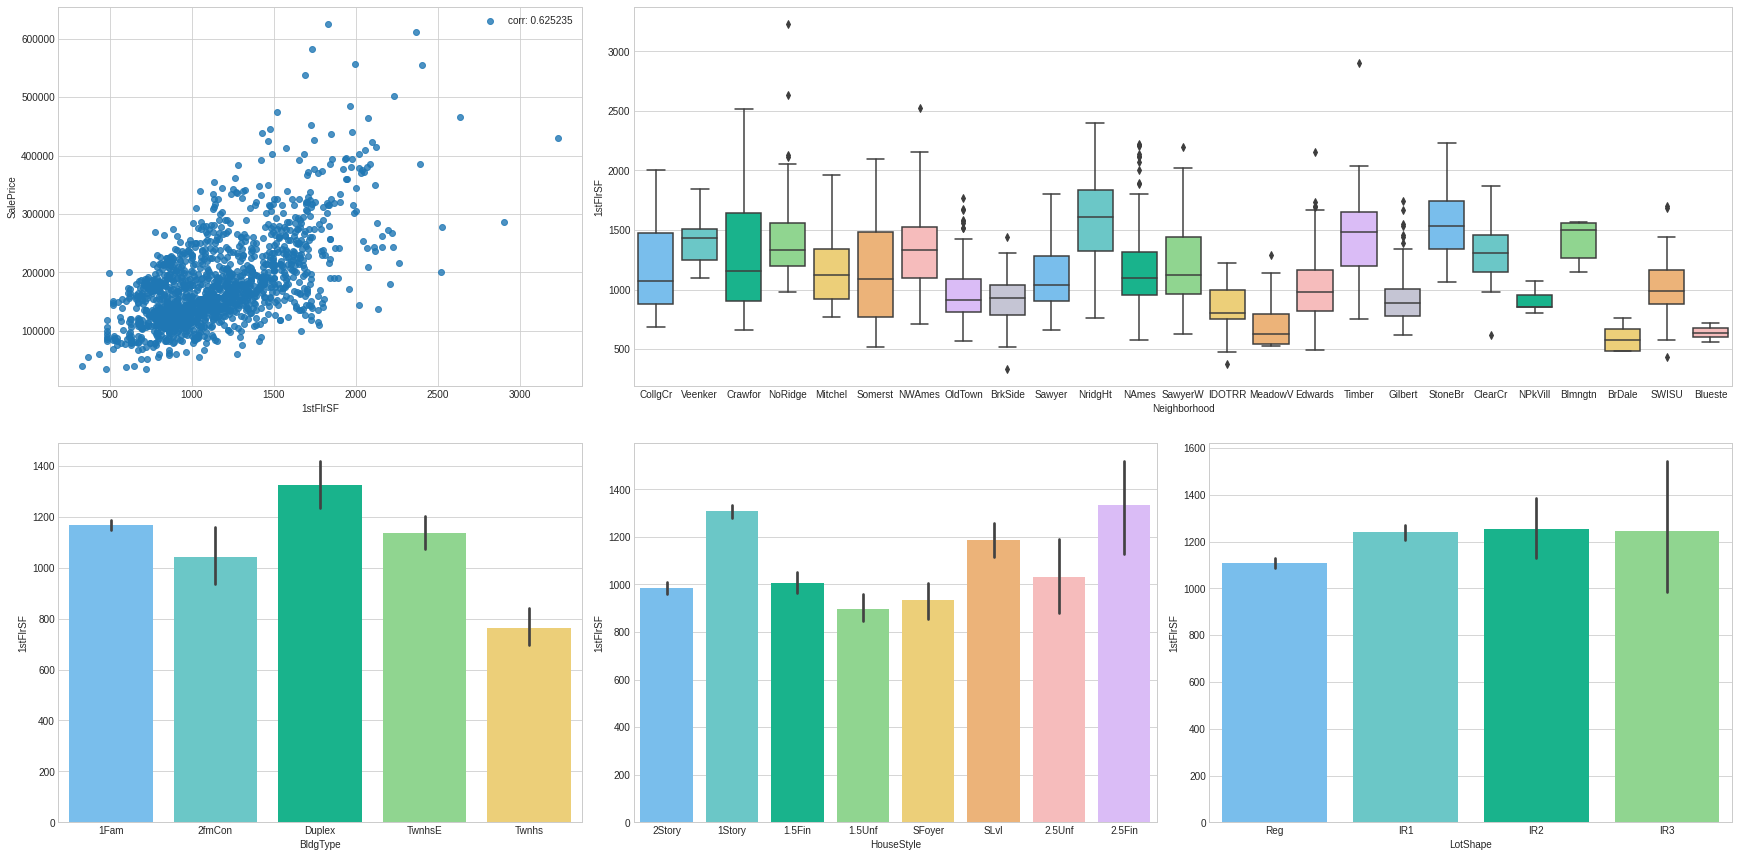

In [66]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['1stFlrSF'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['1stFlrSF'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="1stFlrSF", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="1stFlrSF", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="1stFlrSF", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="1stFlrSF", data=train, palette = mycols);

This feature is important because it has high positive correlation with SalePrice. It varies greatly across neighborhoods, building types, and styles. It does not vary much between lot styles. Because it is continuous, I will turn it into six equal bins.

In [67]:
all['1stFlrSF_Band'] = pd.cut(all['1stFlrSF'], 6)
all['1stFlrSF_Band'].unique()

[(329.239, 1127.5], (1127.5, 1921.0], (1921.0, 2714.5], (2714.5, 3508.0], (4301.5, 5095.0], (3508.0, 4301.5]]
Categories (6, interval[float64]): [(329.239, 1127.5] < (1127.5, 1921.0] < (1921.0, 2714.5] <
                                    (2714.5, 3508.0] < (3508.0, 4301.5] < (4301.5, 5095.0]]

In [68]:
all.loc[all['1stFlrSF']<=1127.5, '1stFlrSF'] = 1
all.loc[(all['1stFlrSF']>1127.5) & (all['1stFlrSF']<=1921), '1stFlrSF'] = 2
all.loc[(all['1stFlrSF']>1921) & (all['1stFlrSF']<=2714.5), '1stFlrSF'] = 3
all.loc[(all['1stFlrSF']>2714.5) & (all['1stFlrSF']<=3508), '1stFlrSF'] = 4
all.loc[(all['1stFlrSF']>3508) & (all['1stFlrSF']<=4301.5), '1stFlrSF'] = 5
all.loc[all['1stFlrSF']>4301.5, '1stFlrSF'] = 6
all['1stFlrSF'] = all['1stFlrSF'].astype(int)

all.drop('1stFlrSF_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["1stFlrSF"], prefix="1stFlrSF")
all.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,...,1stFlrSF-Sq,FullBath-Sq,TotRmsAbvGrd-Sq,YearBuilt-Sq,YearRemodAdd-Sq,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinSF1_1,BsmtFinSF1_2,BsmtFinSF1_3,BsmtFinSF1_4,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinSf2_Flag,BsmtUnfSF_1,BsmtUnfSF_2,BsmtUnfSF_3,TotalBsmtSF_1,TotalBsmtSF_2,TotalBsmtSF_3,TotalBsmtSF_4,TotalBsmtSF_5,TotalBsmtSF_6,TotalBsmtSF_7,TotalBsmtSF_8,1stFlrSF_1,1stFlrSF_2,1stFlrSF_3,1stFlrSF_4,1stFlrSF_5,1stFlrSF_6
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,3,3,No,GasA,Ex,Y,SBrkr,854,0,1710,1.0,0.0,2,...,29.257478,1.414214,2.828427,44.754888,44.754888,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,3,3,Gd,GasA,Ex,Y,SBrkr,0,0,1262,0.0,1.0,2,...,35.524639,1.414214,2.449490,44.452222,44.452222,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,3,3,Mn,GasA,Ex,Y,SBrkr,866,0,1786,1.0,0.0,2,...,30.331502,1.414214,2.449490,44.732538,44.743715,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


***2ndFlrSF***
- Second floor square feet.

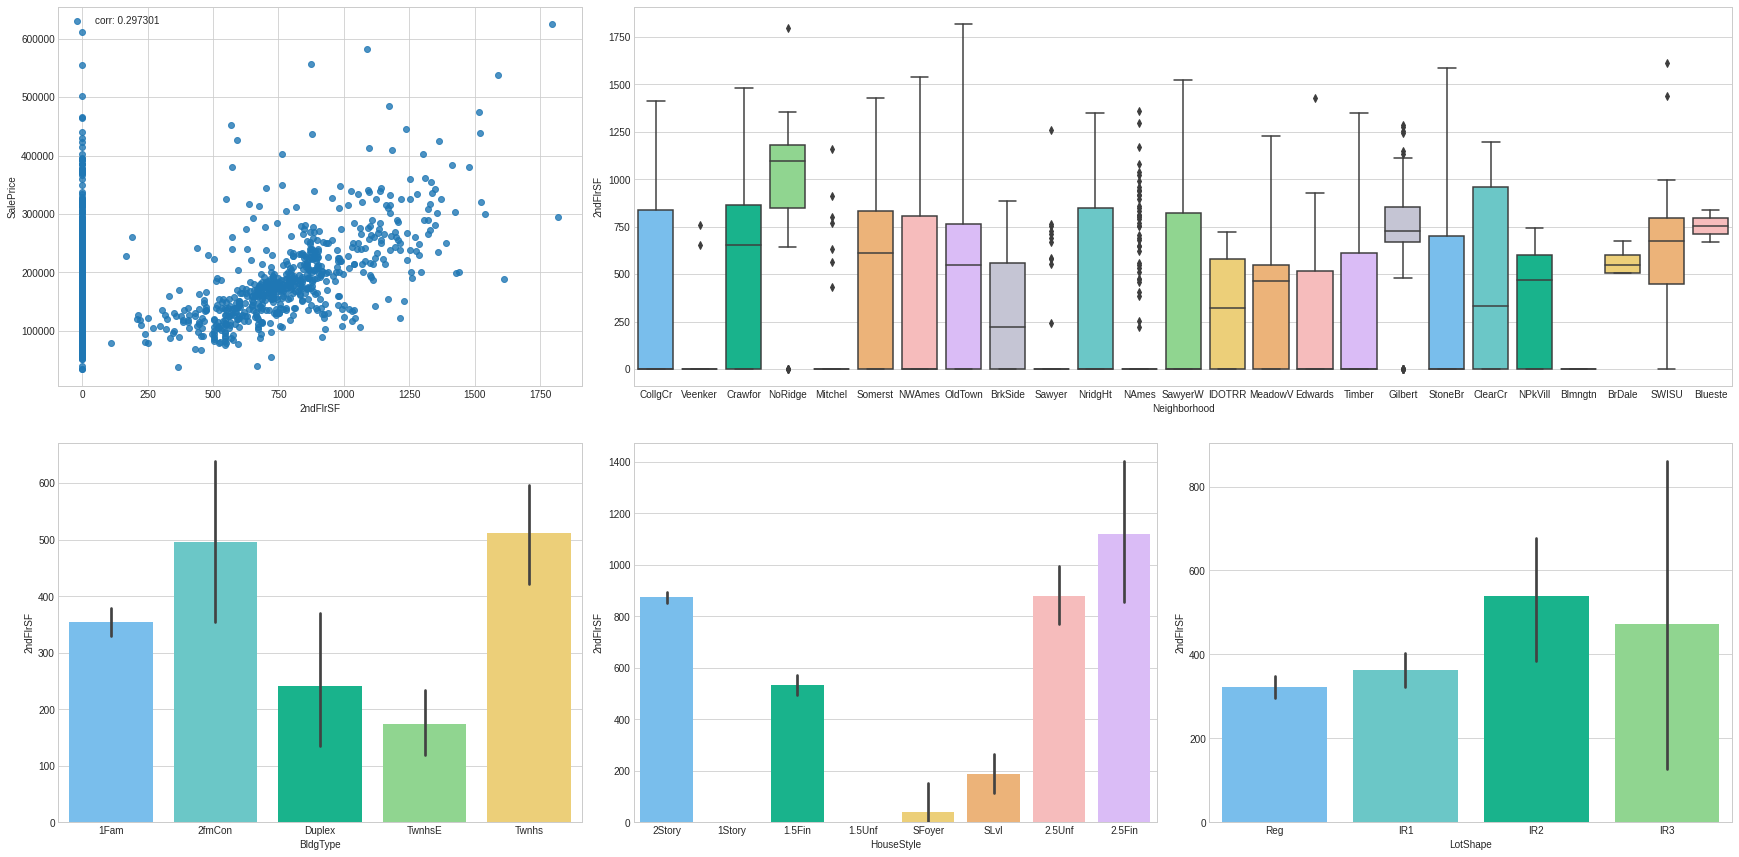

In [69]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['2ndFlrSF'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['2ndFlrSF'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="2ndFlrSF", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="2ndFlrSF", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="2ndFlrSF", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="2ndFlrSF", data=train, palette = mycols);

There is a positive correlation with SalePrice, but it also has a significant number of houses with value = 0. The reason for this could be because not all homes have more than "1Story." Also, there is variation between BldgType, LotShap, and Neighborhood. Because it is continuous, I will cut it into six bins.

In [70]:
all['2ndFlrSF_Band'] = pd.cut(all['2ndFlrSF'], 6)
all['2ndFlrSF_Band'].unique()

[(688.333, 1032.5], (-2.065, 344.167], (1032.5, 1376.667], (344.167, 688.333], (1376.667, 1720.833], (1720.833, 2065.0]]
Categories (6, interval[float64]): [(-2.065, 344.167] < (344.167, 688.333] < (688.333, 1032.5] <
                                    (1032.5, 1376.667] < (1376.667, 1720.833] < (1720.833, 2065.0]]

In [71]:
all.loc[all['2ndFlrSF']<=310.333, '2ndFlrSF'] = 1
all.loc[(all['2ndFlrSF']>310.333) & (all['2ndFlrSF']<=620.667), '2ndFlrSF'] = 2
all.loc[(all['2ndFlrSF']>620.667) & (all['2ndFlrSF']<=931), '2ndFlrSF'] = 3
all.loc[(all['2ndFlrSF']>931) & (all['2ndFlrSF']<=1241.333), '2ndFlrSF'] = 4
all.loc[(all['2ndFlrSF']>1241.333) & (all['2ndFlrSF']<=1551.667), '2ndFlrSF'] = 5
all.loc[all['2ndFlrSF']>1551.667, '2ndFlrSF'] = 6
all['2ndFlrSF'] = all['2ndFlrSF'].astype(int)

all.drop('2ndFlrSF_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["2ndFlrSF"], prefix="2ndFlrSF")
all.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinSF1_1,BsmtFinSF1_2,BsmtFinSF1_3,BsmtFinSF1_4,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinSf2_Flag,BsmtUnfSF_1,BsmtUnfSF_2,BsmtUnfSF_3,TotalBsmtSF_1,TotalBsmtSF_2,TotalBsmtSF_3,TotalBsmtSF_4,TotalBsmtSF_5,TotalBsmtSF_6,TotalBsmtSF_7,TotalBsmtSF_8,1stFlrSF_1,1stFlrSF_2,1stFlrSF_3,1stFlrSF_4,1stFlrSF_5,1stFlrSF_6,2ndFlrSF_1,2ndFlrSF_2,2ndFlrSF_3,2ndFlrSF_4,2ndFlrSF_5,2ndFlrSF_6
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,3,3,No,GasA,Ex,Y,SBrkr,0,1710,1.0,0.0,2,1,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,3,3,Gd,GasA,Ex,Y,SBrkr,0,1262,0.0,1.0,2,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,3,3,Mn,GasA,Ex,Y,SBrkr,0,1786,1.0,0.0,2,1,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


***LowQualFinSF***
- Low quality finished square feet (all floors)

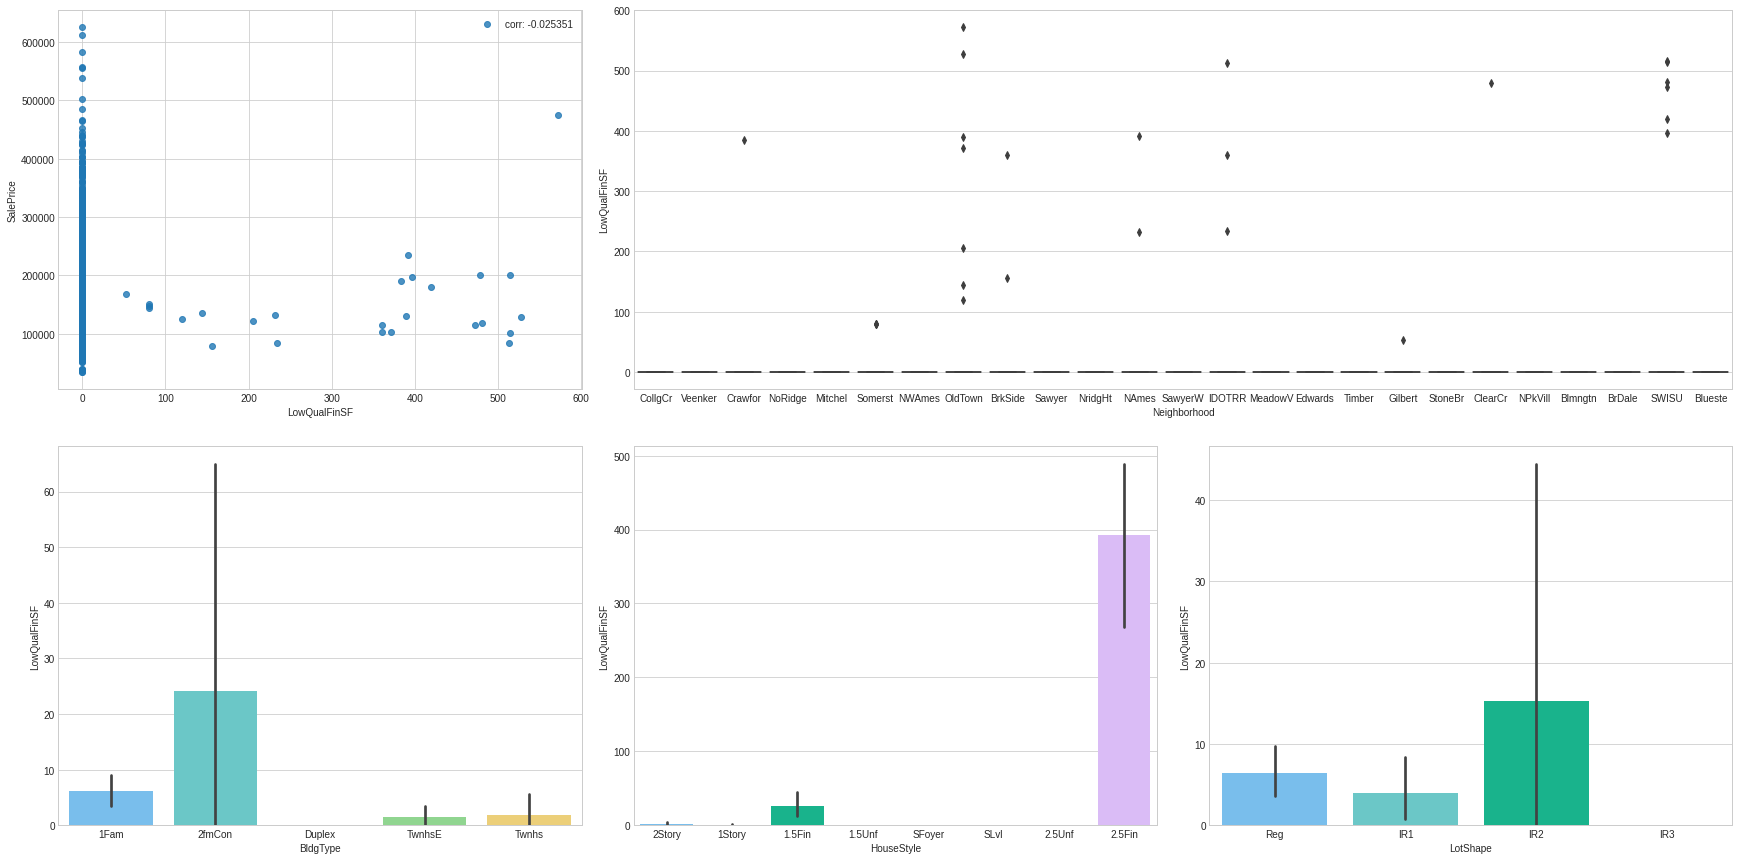

In [72]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['LowQualFinSF'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['LowQualFinSF'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="LowQualFinSF", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="LowQualFinSF", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="LowQualFinSF", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="LowQualFinSF", data=train, palette = mycols);

There are a large number of properties with a value of zero, and very few for anything else. I will flag this continuous variable.

In [73]:
all['LowQualFinSF_Flag'] = all['LowQualFinSF'].map(lambda x:0 if x==0 else 1)
all.drop('LowQualFinSF', axis=1, inplace=True)

***BsmtHalfBath***, ***BsmtFullBath***, ***HalfBath***, ***FullBath***

- Number of bathrooms.

I just summed these variables to get the total amount of bathrooms.

In [74]:
all['TotalBathrooms'] = all['BsmtHalfBath'] + all['BsmtFullBath'] + all['HalfBath'] + all['FullBath']

columns = ['BsmtHalfBath', 'BsmtFullBath', 'HalfBath', 'FullBath']
all.drop(columns, axis=1, inplace=True)

***Bedroom***
- Bedrooms above grade (does not include basement bedrooms)

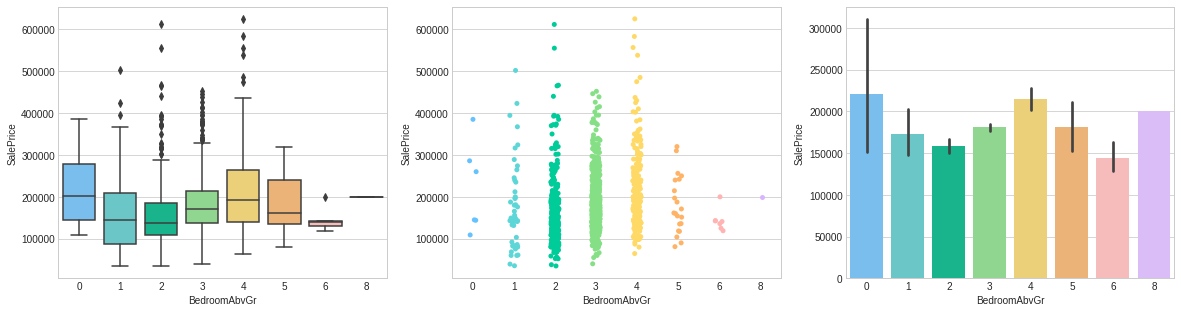

In [75]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BedroomAbvGr", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="BedroomAbvGr", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="BedroomAbvGr", y="SalePrice", data=train, palette = mycols);

- We see a lot of houses with 2 3 and 4 bedrooms above ground, and a very low number of houses with 6 or above.
- Since this is a continuous numeric feature, I will leave it how it is.

***Kitchen***
- Kitchens above grade.

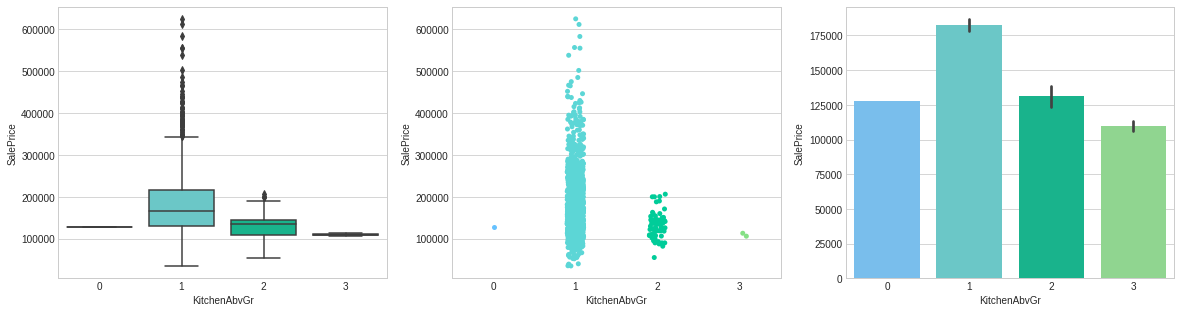

In [76]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="KitchenAbvGr", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="KitchenAbvGr", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="KitchenAbvGr", y="SalePrice", data=train, palette = mycols);

- Similarly to last previous feature, we see just a small number of houses with a large number of kitchens above grade. This shows that most houses have 1 kitchen above grade.
- Since this is a continuous numeric feature, I will leave it as it is.

***KitchenQual***
- Kitchen quality.
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor


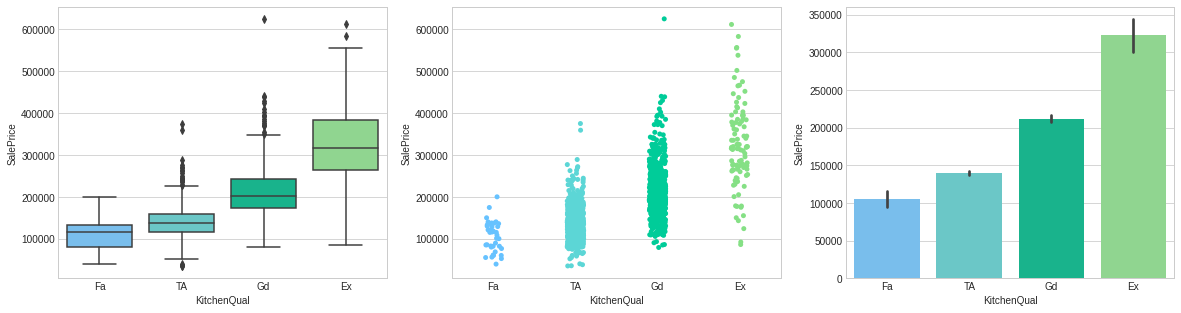

In [77]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="KitchenQual", y="SalePrice", data=train, order=["Fa", "TA", "Gd", "Ex"], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="KitchenQual", y="SalePrice", data=train, size = 5, jitter = True, order=["Fa", "TA", "Gd", "Ex"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="KitchenQual", y="SalePrice", data=train, order=["Fa", "TA", "Gd", "Ex"], palette = mycols);

There is a clear positive correlation between SalePrice and KitchenQual. These values are ordinal so I will replace them by hand.

In [78]:
all['KitchenQual'] = all['KitchenQual'].map({"Fa":1, "TA":2, "Gd":3, "Ex":4})
all['KitchenQual'].unique()

array([3, 2, 4, 1])

***TotRmsAbvGrd***
- Total rooms above grade (does not include bathrooms)

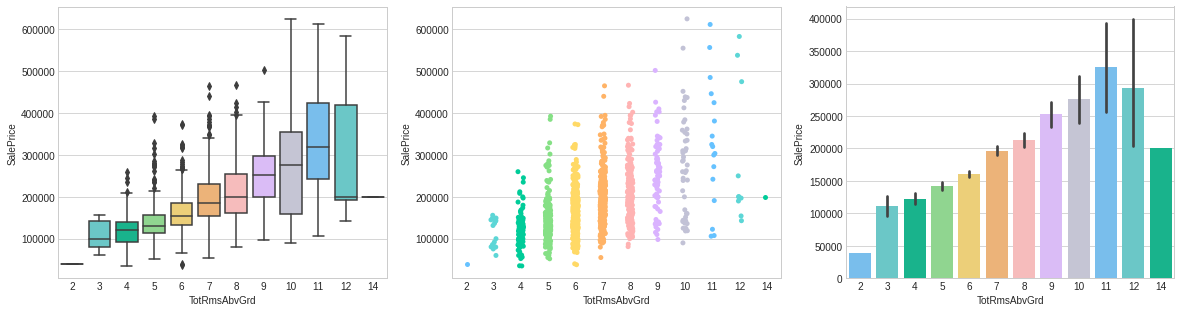

In [79]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="TotRmsAbvGrd", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="TotRmsAbvGrd", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="TotRmsAbvGrd", y="SalePrice", data=train, palette = mycols);

There is a positive correlation between SalePrice and the number of rooms. However, most of the data is concentrated around the middle points so the extreme high and low values are less reliable. I will leave this continuous feature as is.

***Fireplaces***
- Number of fireplaces.

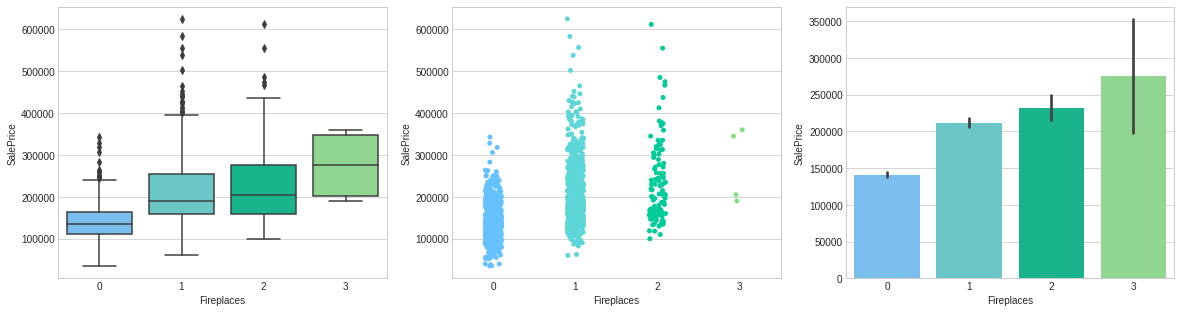

In [80]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Fireplaces", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Fireplaces", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Fireplaces", y="SalePrice", data=train, palette = mycols);

There is a positive correlation between SalePrice and the number of fire places, but most homes either have 1 or no fire places. I will leave this continuous feature as is.

***FireplaceQu***
- Fireplace quality.
       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

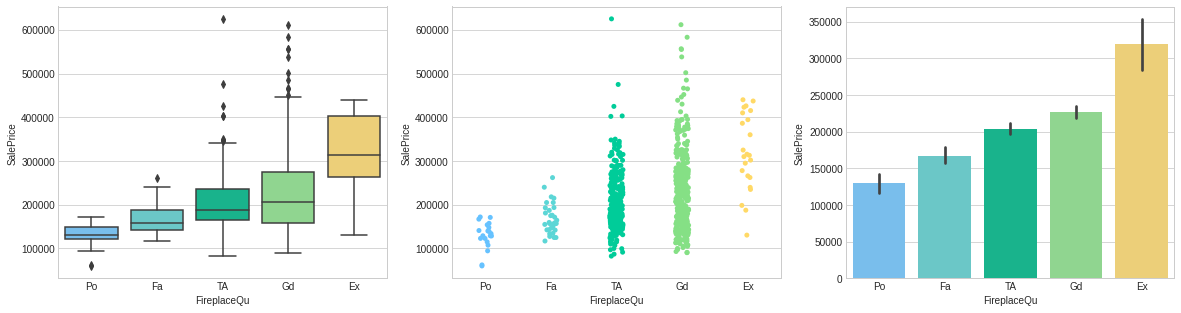

In [81]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="FireplaceQu", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="FireplaceQu", y="SalePrice", data=train, size = 5, jitter = True, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="FireplaceQu", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

There is a positive correlation between SalePrice and the quality of the fireplace, and most houses either have Average or Fair quality fireplaces. Because this is an ordinal feature, I will replace the values by hand.

In [83]:
all['FireplaceQu'] = all['FireplaceQu'].map({"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
all['FireplaceQu'].unique()

array([0, 3, 4, 2, 5, 1])

***GrLivArea***
- Above grade ground living area in square feet.

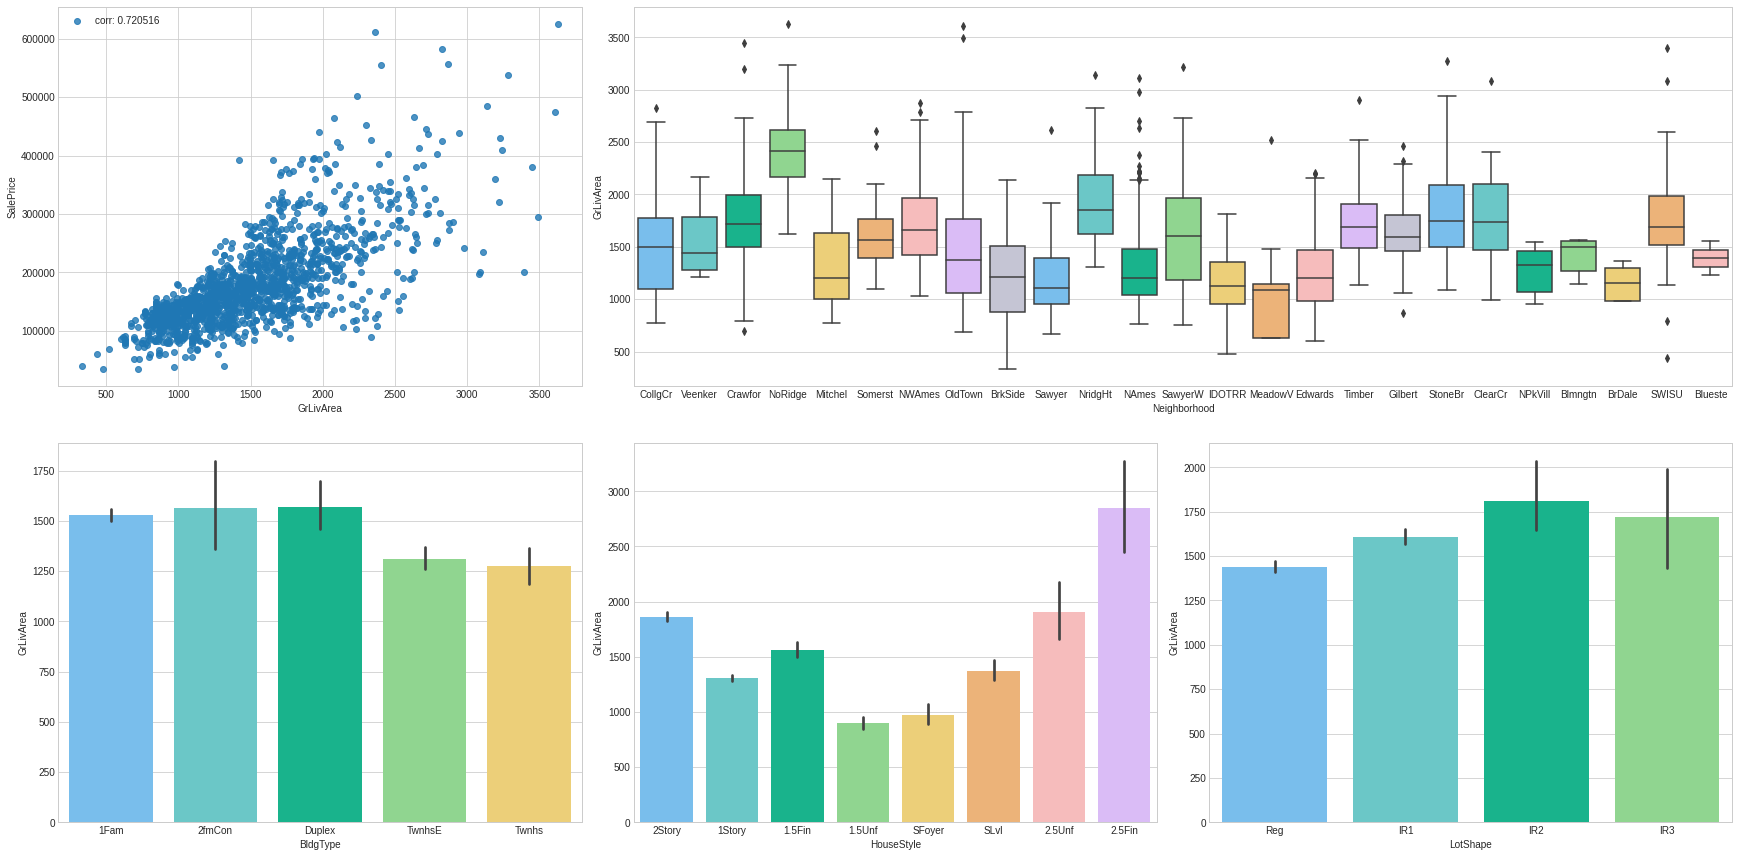

In [84]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['GrLivArea'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="GrLivArea", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="GrLivArea", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="GrLivArea", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="GrLivArea", data=train, palette = mycols);

There is a high positive correlation between between SalePrice and the amount of living area above grade. It also varies between BldgType, HouseStyle, LotShape, and Neighborhood. Because this feature is continuous, I will cut it into six bins.

In [85]:
all['GrLivArea_Band'] = pd.cut(all['GrLivArea'], 6)
all['GrLivArea_Band'].unique()

[(1218.667, 2103.333], (2103.333, 2988.0], (328.692, 1218.667], (2988.0, 3872.667], (3872.667, 4757.333], (4757.333, 5642.0]]
Categories (6, interval[float64]): [(328.692, 1218.667] < (1218.667, 2103.333] < (2103.333, 2988.0] <
                                    (2988.0, 3872.667] < (3872.667, 4757.333] < (4757.333, 5642.0]]

In [86]:
all.loc[all['GrLivArea']<=1127.5, 'GrLivArea'] = 1
all.loc[(all['GrLivArea']>1127.5) & (all['GrLivArea']<=1921), 'GrLivArea'] = 2
all.loc[(all['GrLivArea']>1921) & (all['GrLivArea']<=2714.5), 'GrLivArea'] = 3
all.loc[(all['GrLivArea']>2714.5) & (all['GrLivArea']<=3508), 'GrLivArea'] = 4
all.loc[(all['GrLivArea']>3508) & (all['GrLivArea']<=4301.5), 'GrLivArea'] = 5
all.loc[all['GrLivArea']>4301.5, 'GrLivArea'] = 6
all['GrLivArea'] = all['GrLivArea'].astype(int)

all.drop('GrLivArea_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["GrLivArea"], prefix="GrLivArea")
all.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,Heating,HeatingQC,CentralAir,Electrical,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,...,BsmtFinSF1_3,BsmtFinSF1_4,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinSf2_Flag,BsmtUnfSF_1,BsmtUnfSF_2,BsmtUnfSF_3,TotalBsmtSF_1,TotalBsmtSF_2,TotalBsmtSF_3,TotalBsmtSF_4,TotalBsmtSF_5,TotalBsmtSF_6,TotalBsmtSF_7,TotalBsmtSF_8,1stFlrSF_1,1stFlrSF_2,1stFlrSF_3,1stFlrSF_4,1stFlrSF_5,1stFlrSF_6,2ndFlrSF_1,2ndFlrSF_2,2ndFlrSF_3,2ndFlrSF_4,2ndFlrSF_5,2ndFlrSF_6,LowQualFinSF_Flag,TotalBathrooms,GrLivArea_1,GrLivArea_2,GrLivArea_3,GrLivArea_4,GrLivArea_5,GrLivArea_6
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,3,3,No,GasA,Ex,Y,SBrkr,3,1,3,8,Typ,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,4.0,0,1,0,0,0,0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,3,3,Gd,GasA,Ex,Y,SBrkr,3,1,2,6,Typ,1,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,3.0,0,1,0,0,0,0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,3,3,Mn,GasA,Ex,Y,SBrkr,3,1,3,6,Typ,1,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,4.0,0,1,0,0,0,0


<a id='architectural_&_structural'></a>
#### 4.2.3 - Architectural & Structural

***MSSubClass***
- Identifies the type of dwelling involved in the sale.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

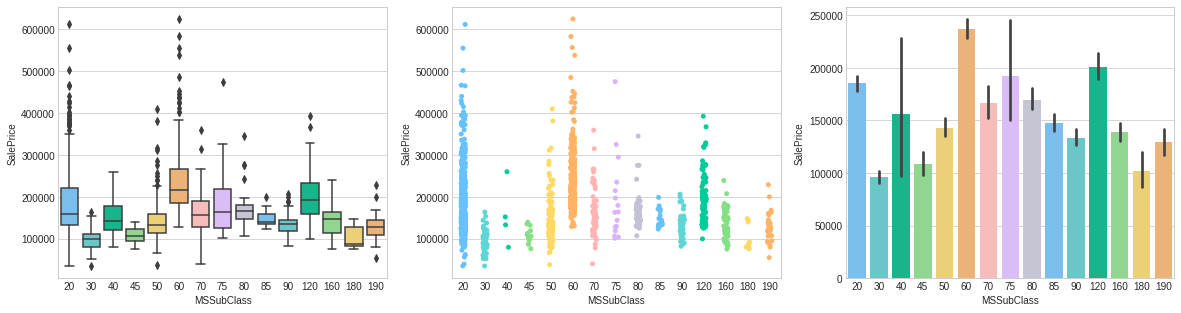

In [87]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="MSSubClass", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="MSSubClass", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="MSSubClass", y="SalePrice", data=train, palette = mycols);

Each class represents a style of the building with the highest averages for 1 and 2 story homes built after 1946. There is also large variance between each class, and although it is a continuous variable, it actually should be categorical. I will create dummy variables.

In [93]:
all['MSSubClass'] = all['MSSubClass'].astype(str)

all = pd.get_dummies(all, columns = ["MSSubClass"], prefix="MSSubClass")
all.head(3)

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,Heating,HeatingQC,CentralAir,Electrical,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,...,TotalBsmtSF_4,TotalBsmtSF_5,TotalBsmtSF_6,TotalBsmtSF_7,TotalBsmtSF_8,1stFlrSF_1,1stFlrSF_2,1stFlrSF_3,1stFlrSF_4,1stFlrSF_5,1stFlrSF_6,2ndFlrSF_1,2ndFlrSF_2,2ndFlrSF_3,2ndFlrSF_4,2ndFlrSF_5,2ndFlrSF_6,LowQualFinSF_Flag,TotalBathrooms,GrLivArea_1,GrLivArea_2,GrLivArea_3,GrLivArea_4,GrLivArea_5,GrLivArea_6,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
0,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,3,3,No,GasA,Ex,Y,SBrkr,3,1,3,8,Typ,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,3,3,Gd,GasA,Ex,Y,SBrkr,3,1,2,6,Typ,1,3,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,3.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,3,3,Mn,GasA,Ex,Y,SBrkr,3,1,3,6,Typ,1,3,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


***BldgType***
- Type of dwelling.

       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

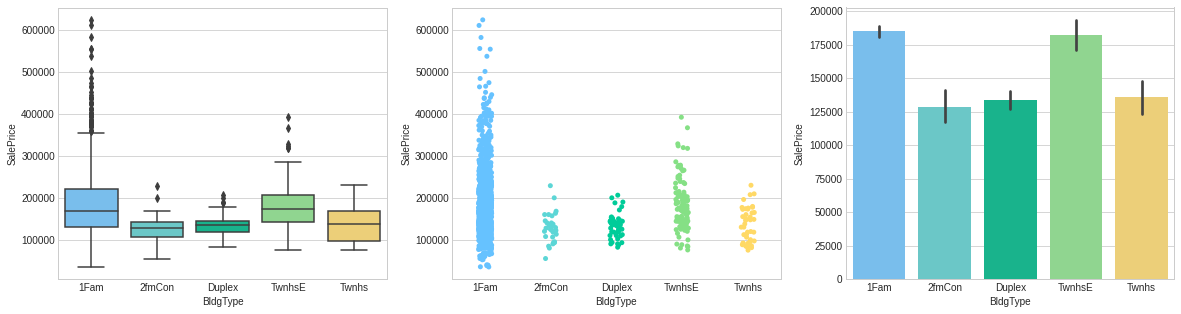

In [94]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BldgType", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="BldgType", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="BldgType", y="SalePrice", data=train, palette = mycols);

The majority of the data fall within the "1Fam" category, and not much variance in the other categories. I will create dummy features.

In [97]:
all['BldgType'] = all['BldgType'].astype(str)

all = pd.get_dummies(all, columns = ["BldgType"], prefix="BldgType")
all.head(3)

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,Heating,HeatingQC,CentralAir,Electrical,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,...,1stFlrSF_1,1stFlrSF_2,1stFlrSF_3,1stFlrSF_4,1stFlrSF_5,1stFlrSF_6,2ndFlrSF_1,2ndFlrSF_2,2ndFlrSF_3,2ndFlrSF_4,2ndFlrSF_5,2ndFlrSF_6,LowQualFinSF_Flag,TotalBathrooms,GrLivArea_1,GrLivArea_2,GrLivArea_3,GrLivArea_4,GrLivArea_5,GrLivArea_6,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,3,3,No,GasA,Ex,Y,SBrkr,3,1,3,8,Typ,0,0,Attchd,...,1,0,0,0,0,0,0,0,1,0,0,0,0,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,3,3,Gd,GasA,Ex,Y,SBrkr,3,1,2,6,Typ,1,3,Attchd,...,0,1,0,0,0,0,1,0,0,0,0,0,0,3.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,3,3,Mn,GasA,Ex,Y,SBrkr,3,1,3,6,Typ,1,3,Attchd,...,1,0,0,0,0,0,0,0,1,0,0,0,0,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


***HouseStyle***
- Style of dwelling.
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

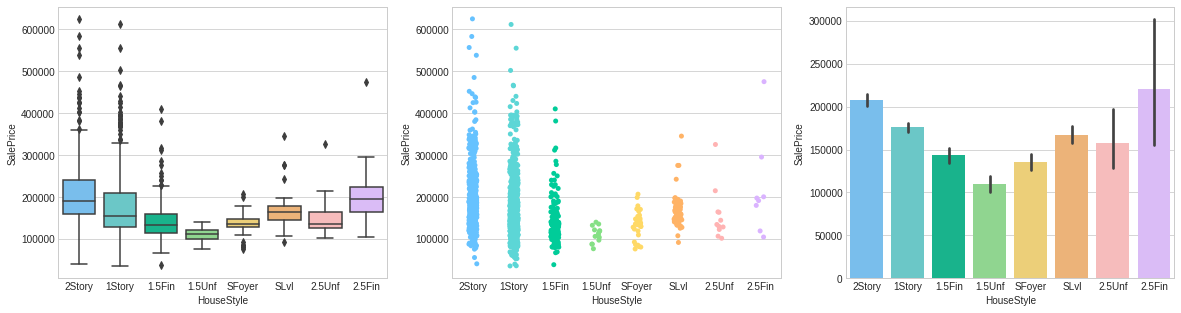

In [98]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="HouseStyle", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="HouseStyle", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="HouseStyle", y="SalePrice", data=train, palette = mycols);

Most of the data belongs to both the 2Story and 1Story categories. There are also some extremes especially in the 2.5 level categories. I will cluster a few of these categories because some have so few values in it.

In [99]:
all_data['HouseStyle'] = all_data['HouseStyle'].map({"2Story":"2Story", "1Story":"1Story", "1.5Fin":"1.5Story", "1.5Unf":"1.5Story", 
                                                     "SFoyer":"SFoyer", "SLvl":"SLvl", "2.5Unf":"2.5Story", "2.5Fin":"2.5Story"})

all_data = pd.get_dummies(all_data, columns = ["HouseStyle"], prefix="HouseStyle").drop(columns = ["HouseStyle"])
all_data.head(3)

NameError: ignored

***OverallQual***
- Rates the overall material and finish of the house.
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="OverallQual", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="OverallQual", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="OverallQual", y="SalePrice", data=train, palette = mycols);

This numeric feature is actually ordinal with SalePrice increasing as OverallQual increases. I will keep it as is. 

***OverallCond***
- Rates the overall condition of the house.
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="OverallCond", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="OverallCond", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="OverallCond", y="SalePrice", data=train, palette = mycols);

OverallCond is an ordinal feature despite it being numeric. It's interesting as the category 5 has the most number of data points and the highest median. I will leave it as is.

***YearRemodAdd***
- Remodel date (same as construction date if no remodeling or additions).

In [ ]:
plt.subplots(figsize =(30, 15))

plt.subplot(3, 1, 1)
sns.boxplot(x="YearRemodAdd", y="SalePrice", data=train, palette = mycols);

plt.subplot(3, 1, 2)
sns.stripplot(x="YearRemodAdd", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(3, 1, 3)
sns.barplot(x="YearRemodAdd", y="SalePrice", data=train, palette = mycols);

This feature shows that the newer the remodeling of a home, the higher the SalePrice. However, creating a new feature that takes the difference in number of years between remodeling and original construction might be a better feature.

In [ ]:
train['Remod_Diff'] = train['YearRemodAdd'] - train['YearBuilt']

plt.subplot(3, 1, 1)
sns.boxplot(x="Remod_Diff", y="SalePrice", data=train, palette = mycols);

plt.subplot(3, 1, 2)
sns.stripplot(x="Remod_Diff", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(3, 1, 3)
sns.barplot(x="Remod_Diff", y="SalePrice", data=train, palette = mycols);

This new feature does not show a strictly positive correlation between SalePrice and years between remodels. I will leave the variable as is and remove Remod_Diff

In [ ]:
all['Remod_Diff'] = all['YearRemodAdd'] - all['YearBuilt']

all.drop('YearRemodAdd', axis=1, inplace=True)

***YearBuilt***
- Original construction date.

In [ ]:
plt.subplots(figsize =(30, 15))

plt.subplot(3, 1, 1)
sns.boxplot(x="YearBuilt", y="SalePrice", data=train, palette = mycols);

plt.subplot(3, 1, 2)
sns.stripplot(x="YearBuilt", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(3, 1, 3)
sns.barplot(x="YearBuilt", y="SalePrice", data=train, palette = mycols);


As houses become more modern, I can see a fairly consistent positive trend. I will cut and bin this feature.

In [ ]:
all['YearBuilt_Band'] = pd.cut(all['YearBuilt'], 7)
all['YearBuilt_Band'].unique()

In [ ]:
all.loc[all['YearBuilt']<=1892, 'YearBuilt'] = 1
all.loc[(all['YearBuilt']>1892) & (all['YearBuilt']<=1911), 'YearBuilt'] = 2
all.loc[(all['YearBuilt']>1911) & (all['YearBuilt']<=1931), 'YearBuilt'] = 3
all.loc[(all['YearBuilt']>1931) & (all['YearBuilt']<=1951), 'YearBuilt'] = 4
all.loc[(all['YearBuilt']>1951) & (all['YearBuilt']<=1971), 'YearBuilt'] = 5
all.loc[(all['YearBuilt']>1971) & (all['YearBuilt']<=1990), 'YearBuilt'] = 6
all.loc[all['YearBuilt']>1990, 'YearBuilt'] = 7
all['YearBuilt'] = all['YearBuilt'].astype(int)

all.drop('YearBuilt_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["YearBuilt"], prefix="YearBuilt")
all.head(3)

***Foundation***
- Type of foundation.
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Foundation", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="Foundation", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Foundation", y="SalePrice", data=train, palette = mycols);

The first three classes contain most of the data while the last three are very sparse. I will not cluster the last three together because SalePrice's mean and median are too different from each other. I will create dummy variables for this feature.

In [ ]:
all = pd.get_dummies(all, columns = ["Foundation"], prefix="Foundation")
all.head(3)

***Functional***
- Home functionality.
       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Functional", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Functional", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Functional", y="SalePrice", data=train, palette = mycols);

The vast majority of data lie in the Typ category. This is an ordinal feature so I will manually replace each category with a number.

In [ ]:
all['Functional'] = all['Functional'].map({"Sev":1, "Maj2":2, "Maj1":3, "Mod":4, "Min2":5, "Min1":6, "Typ":7})
all['Functional'].unique()

<a id='exterior'></a>
#### 4.2.4 - Exterior

***RoofStyle***
- Type of roof.

       Flat	    Flat
       Gable	   Gable
       Gambrel	 Gabrel (Barn)
       Hip	     Hip
       Mansard	 Mansard
       Shed	    Shed

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="RoofStyle", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="RoofStyle", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="RoofStyle", y="SalePrice", data=train, palette = mycols);

Most data lie in the first two categories. I will create dummy features.

In [ ]:
all = pd.get_dummies(all, columns = ["RoofStyle"], prefix="RoofStyle")
all.head(3)

***RoofMatl***
- Roof material.
       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	  Metal
       Roll	   Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingle

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="RoofMatl", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="RoofMatl", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="RoofMatl", y="SalePrice", data=train, palette = mycols);

Virtually all the data belongs to the CompShg category. I will create dummy variables for now.

In [ ]:
all = pd.get_dummies(all, columns = ["RoofMatl"], prefix="RoofMatl")
all.head(3)

***Exterior1st*** & ***Exterior2nd***
- Exterior covering on house.

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	 Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	  Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	  Stone
       Stucco	 Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [ ]:
plt.subplots(figsize =(30, 15))

plt.subplot(3, 1, 1)
sns.boxplot(x="Exterior1st", y="SalePrice", data=train, palette = mycols);

plt.subplot(3, 1, 2)
sns.stripplot(x="Exterior1st", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(3, 1, 3)
sns.barplot(x="Exterior1st", y="SalePrice", data=train, palette = mycols);

In [ ]:
plt.subplots(figsize =(30, 15))

plt.subplot(3, 1, 1)
sns.boxplot(x="Exterior2nd", y="SalePrice", data=train, palette = mycols);

plt.subplot(3, 1, 2)
sns.stripplot(x="Exterior2nd", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(3, 1, 3)
sns.barplot(x="Exterior2nd", y="SalePrice", data=train, palette = mycols);

These two variables look almost the same. I will drop the 2nd feature and create dummy variables from the first one.

In [ ]:
def Exter2(col):
    if col['Exterior2nd'] == col['Exterior1st']:
        return 1
    else:
        return 0
    
all_data['ExteriorMatch_Flag'] = all_data.apply(Exter2, axis=1)
all_data.drop('Exterior2nd', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ["Exterior1st"], prefix="Exterior1st")
all_data.head(3)

***MasVnrType***
- Masonry veneer type.

       BrkCmn	 Brick Common
       BrkFace	Brick Face
       CBlock	 Cinder Block
       None	   None
       Stone	  Stone

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="MasVnrType", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="MasVnrType", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="MasVnrType", y="SalePrice", data=train, palette = mycols);

With the exception of the last class, there seems to be a good spread of the data between the classes. I will create dummy variables.

In [ ]:
all = pd.get_dummies(all, columns = ["MasVnrType"], prefix="MasVnrType")
all.head(3)

***MasVnrArea***
- Masonry veneer area in square feet.

In [ ]:
# grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
# plt.subplots(figsize =(30, 15))

# plt.subplot(grid[0, 0])
# g = sns.regplot(x=train['MasVnrArea'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['MasVnrArea'], train['SalePrice'])[0]))
# g = g.legend(loc="best")

# plt.subplot(grid[0, 1:])
# sns.boxplot(x="Neighborhood", y="MasVnrArea", data=train, palette = mycols)

# plt.subplot(grid[1, 0]);
# sns.barplot(x="BldgType", y="MasVnrArea", data=train, palette = mycols)

# plt.subplot(grid[1, 1]);
# sns.barplot(x="HouseStyle", y="MasVnrArea", data=train, palette = mycols)

# plt.subplot(grid[1, 2]);
# sns.barplot(x="LotShape", y="MasVnrArea", data=train, palette = mycols);

I will drop this feature because it has negligible correlation with SalePrice and also correlates highly with MasVnrType. This is because if MasVnrType = None then this feature has to be zero.

In [ ]:
all.drop('MasVnrArea', axis=1, inplace=True)

***ExterQual***
- Evaluates the quality of the material on the exterior.
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor


In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="ExterQual", y="SalePrice", data=train, order=['Fa','TA','Gd', 'Ex'], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="ExterQual", y="SalePrice", data=train, size = 5, jitter = True, order=['Fa','TA','Gd', 'Ex'], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="ExterQual", y="SalePrice", data=train, order=['Fa','TA','Gd', 'Ex'], palette = mycols);

As ExterQual increases, SalePrice increases. Because there is clear order in this variable, I will manually code these features.

In [ ]:
all['ExterQual'] = all['ExterQual'].map({"Fa":1, "TA":2, "Gd":3, "Ex":4})
all['ExterQual'].unique()

***ExterCond***
- Evaluates the present condition of the material on the exterior. 
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="ExterCond", y="SalePrice", data=train, order=['Po','Fa','TA','Gd', 'Ex'], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="ExterCond", y="SalePrice", data=train, size = 5, jitter = True, order=['Po','Fa','TA','Gd', 'Ex'], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="ExterCond", y="SalePrice", data=train, order=['Po','Fa','TA','Gd', 'Ex'], palette = mycols);

Most of the values belong in the Ta and Gd categories, and a combined total of four values on either ends. This feature is supposed to be ordinal, but it truly is not. I will create dummy features.

In [ ]:
all_data = pd.get_dummies(all_data, columns = ["ExterCond"], prefix="ExterCond")
all_data.head(3)

***GarageType***
- Garage location.
       2Types	 More than one type of garage
       Attchd	 Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	 Detached from home
       NA	     No Garage

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="GarageType", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="GarageType", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="GarageType", y="SalePrice", data=train, palette = mycols);

The plots do not show clear correlation between GarageType and SalePrice. Because this feature is categorical, I will create dummy features.

In [ ]:
all = pd.get_dummies(all, columns = ["GarageType"], prefix="GarageType")
all.head(3)

***GarageYrBlt***
- Year garage was built.

In [ ]:
plt.subplots(figsize =(30, 15))

plt.subplot(3, 1, 1)
sns.boxplot(x="GarageYrBlt", y="SalePrice", data=train, palette = mycols);

plt.subplot(3, 1, 2)
sns.stripplot(x="GarageYrBlt", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(3, 1, 3)
sns.boxplot(x="GarageYrBlt", y="SalePrice", data=train, palette = mycols);

There is a slight upward trend as the homes become more modern. I will leave this variable as is.

***GarageFinish***
- Interior finish of the garage.
       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage



In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="GarageFinish", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="GarageFinish", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="GarageFinish", y="SalePrice", data=train, palette = mycols);

There is a nice distripution of the data between the three categories. I will create dummy features.

In [ ]:
all = pd.get_dummies(all, columns = ["GarageFinish"], prefix="GarageFinish")
all.head(3)

***GarageCars***
- Size of the garage in car capacity.

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="GarageCars", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="GarageCars", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="GarageCars", y="SalePrice", data=train, palette = mycols);

There is generally a positive correlation between the SalePrice and garage-car capacity. The exception is four cars but this could be due the low frequency of that category. Because this feature is continuous I will leave it as is.

***GarageArea***
- Size of the garage in square feet.

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['GarageArea'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['GarageArea'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="GarageArea", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="GarageArea", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="GarageArea", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="GarageArea", data=train, palette = mycols);

GarageArea has a high positive correlation with SalePrice. I will bin this feature and create dummy variables.

In [ ]:
all['GarageArea_Band'] = pd.cut(all['GarageArea'], 3)
all['GarageArea_Band'].unique()

In [ ]:
all.loc[all['GarageArea']<=496, 'GarageArea'] = 1
all.loc[(all['GarageArea']>496) & (all['GarageArea']<=992), 'GarageArea'] = 2
all.loc[all['GarageArea']>992, 'GarageArea'] = 3
all['GarageArea'] = all['GarageArea'].astype(int)

all.drop('GarageArea_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["GarageArea"], prefix="GarageArea")
all.head(3)

***GarageQual***
- Garage quality.
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="GarageQual", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="GarageQual", y="SalePrice", data=train, size = 5, jitter = True, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="GarageQual", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

Most of the values belong to the TA category, and I will cluster the lower categories together. Last, I will create dummy variables.

In [ ]:
all['GarageQual'] = all['GarageQual'].map({"None":"None", "Po":"Low", "Fa":"Low", "TA":"TA", "Gd":"High", "Ex":"High"})
all['GarageQual'].unique()

In [ ]:
all = pd.get_dummies(all, columns = ["GarageQual"], prefix="GarageQual")
all.head(3)

***GarageCond***
- Garage condition.
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="GarageCond", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="GarageCond", y="SalePrice", data=train, size = 5, jitter = True, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="GarageCond", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

The feature here is very similar to the last one. I will also cluster and then use dummy features.

In [ ]:
al['GarageCond'] = al['GarageCond'].map({"None":"None", "Po":"Low", "Fa":"Low", "TA":"TA", "Gd":"High", "Ex":"High"})
al['GarageCond'].unique()

In [ ]:
all = pd.get_dummies(all, columns = ["GarageCond"], prefix="GarageCond")
all.head(3)

***WoodDeckSF***
- Wood deck area in SF.

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['WoodDeckSF'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['WoodDeckSF'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="WoodDeckSF", data=train)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="WoodDeckSF", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="WoodDeckSF", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="WoodDeckSF", data=train, palette = mycols);

This feature has positive correlation with SalePrice, and we can see that it varies with location, building type, style, and lot size. Because there are so many 0 values, I will flag it in it's own column. I will then bin it and create dummy variables.

In [ ]:
def WoodDeckFlag(col):
    if col['WoodDeckSF'] == 0:
        return 1
    else:
        return 0
    
all['NoWoodDeck_Flag'] = all.apply(WoodDeckFlag, axis=1)

all['WoodDeckSF_Band'] = pd.cut(all['WoodDeckSF'], 4)

all.loc[all['WoodDeckSF']<=356, 'WoodDeckSF'] = 1
all.loc[(all['WoodDeckSF']>356) & (all['WoodDeckSF']<=712), 'WoodDeckSF'] = 2
all.loc[(all['WoodDeckSF']>712) & (all['WoodDeckSF']<=1068), 'WoodDeckSF'] = 3
all.loc[all['WoodDeckSF']>1068, 'WoodDeckSF'] = 4
all['WoodDeckSF'] = all['WoodDeckSF'].astype(int)

all.drop('WoodDeckSF_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["WoodDeckSF"], prefix="WoodDeckSF")
all.head(3)

***OpenPorchSF***, ***EnclosedPorch***, ***3SsnPorch*** & ***ScreenPorch***
- Because these are essentially all porches, I will sum them together for a total square footage.

In [ ]:
all['TotalPorchSF'] = all['OpenPorchSF'] + all['OpenPorchSF'] + all['EnclosedPorch'] + all['3SsnPorch'] + all['ScreenPorch'] 
train['TotalPorchSF'] = train['OpenPorchSF'] + train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['TotalPorchSF'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['TotalPorchSF'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="TotalPorchSF", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="TotalPorchSF", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="TotalPorchSF", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="TotalPorchSF", data=train, palette = mycols);

There are many data points with a value of 0, and there is positive correlation for the size of the porch and the price of the home. There is also much variation based on location, building type, style, and lot. I will create a new feature flagging the absence of a porch, bin, and create dummy variables for the rest.

In [ ]:
def PorchFlag(col):
    if col['TotalPorchSF'] == 0:
        return 1
    else:
        return 0
    
all['NoPorch_Flag'] = all.apply(PorchFlag, axis=1)

all['TotalPorchSF_Band'] = pd.cut(all['TotalPorchSF'], 4)
all['TotalPorchSF_Band'].unique()

In [ ]:
all.loc[all['TotalPorchSF']<=431, 'TotalPorchSF'] = 1
all.loc[(all['TotalPorchSF']>431) & (all['TotalPorchSF']<=862), 'TotalPorchSF'] = 2
all.loc[(all['TotalPorchSF']>862) & (all['TotalPorchSF']<=1293), 'TotalPorchSF'] = 3
all.loc[all['TotalPorchSF']>1293, 'TotalPorchSF'] = 4
all['TotalPorchSF'] = all['TotalPorchSF'].astype(int)

all.drop('TotalPorchSF_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["TotalPorchSF"], prefix="TotalPorchSF")
all.head(3)

***PoolArea***
- Pool area in square feet. 

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['PoolArea'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['PoolArea'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="PoolArea", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="PoolArea", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="PoolArea", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="PoolArea", data=train, palette = mycols);

Virtually, all the data is zero as most homes do not have a pool. I will flag the variable instead.

In [ ]:
def PoolFlag(col):
    if col['PoolArea'] == 0:
        return 0
    else:
        return 1
    
all['HasPool_Flag'] = all.apply(PoolFlag, axis=1)
all.drop('PoolArea', axis=1, inplace=True)

***PoolQC***
- Pool quality.
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="PoolQC", y="SalePrice", data=train, order=["Fa", "Gd", "Ex"], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="PoolQC", y="SalePrice", data=train, size = 5, jitter = True, order=["Fa", "Gd", "Ex"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="PoolQC", y="SalePrice", data=train, order=["Fa", "Gd", "Ex"], palette = mycols);

This variable is dependent on the last one, and since we know virtually all the homes do not have a pool, I will just remove this feature all together.

In [ ]:
all.drop('PoolQC', axis=1, inplace=True)

***Fence***
- Fence quality.
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Fence", y="SalePrice", data=train, order = ["MnWw", "GdWo", "MnPrv", "GdPrv"], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Fence", y="SalePrice", data=train, size = 5, jitter = True, order = ["MnWw", "GdWo", "MnPrv", "GdPrv"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Fence", y="SalePrice", data=train, order = ["MnWw", "GdWo", "MnPrv", "GdPrv"], palette = mycols);

There is a slight positive correlation between fences with "good privacy" the price of the home. However, it is not enough to consider it ordinal, especially as "good wood" and "minimum privacy" categories are ambiguous. I will create dummy features instead.

In [ ]:
all = pd.get_dummies(all, columns = ["Fence"], prefix="Fence")
all.head(3)

<a id='location'></a>
#### 4.2.5 - Location

***MSZoning***
- Identifies the general zoning classification of the sale. 
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="MSZoning", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="MSZoning", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="MSZoning", y="SalePrice", data=train, palette = mycols);

This is a categorical feature without order. I will create dummy features.

In [ ]:
all = pd.get_dummies(all, columns = ["MSZoning"], prefix="MSZoning")
all.head(3)

***Neighborhood***
- Physical locations within Ames city limits.
       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	 Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	 Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	  North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	 Northwest Ames
       OldTown	Old Town
       SWISU	  South & West of Iowa State University
       Sawyer	 Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	 Timberland
       Veenker	Veenker

In [ ]:
plt.subplots(figsize =(30, 15))

plt.subplot(3, 1, 1)
sns.boxplot(x="Neighborhood", y="SalePrice", data=train, palette = mycols)

plt.subplot(3, 1, 2)
sns.stripplot(x="Neighborhood", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(3, 1, 3)
sns.barplot(x="Neighborhood", y="SalePrice", data=train, palette = mycols);

Neighborhood is an important feature because we have such a high average range in some categories and low average in others. I will craete dummy features.

In [ ]:
all = pd.get_dummies(all, columns = ["Neighborhood"], prefix="Neighborhood")
all.head(3)

***Condition1*** & ***Condition2***
- Proximity to various conditions.
       Artery	Adjacent to arterial street
       Feedr	 Adjacent to feeder street	
       Norm	  Normal	
       RRNn	  Within 200' of North-South Railroad
       RRAn	  Adjacent to North-South Railroad
       PosN	  Near positive off-site feature--park, greenbelt, etc.
       PosA	  Adjacent to postive off-site feature
       RRNe	  Within 200' of East-West Railroad
       RRAe	  Adjacent to East-West Railroad

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Condition1", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Condition1", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Condition1", y="SalePrice", data=train, palette = mycols);

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Condition2", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Condition2", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Condition2", y="SalePrice", data=train, palette = mycols);

For this feature, I'm going to cluster categories based upon the description. For example, all "Railroad" categories will be clustered together. After, I will dummy the features, and then flag Condition 2 to indicate if the value is different from Condition 1. This is because Condition 2 is dependent on Condition 1 and the values are very similar.

In [ ]:
all['Condition1'] = all['Condition1'].map({"Norm":"Norm", "Feedr":"Street", "PosN":"Pos", "Artery":"Street", "RRAe":"Train",
                                                    "RRNn":"Train", "RRAn":"Train", "PosA":"Pos", "RRNe":"Train"})
all['Condition2'] = all['Condition2'].map({"Norm":"Norm", "Feedr":"Street", "PosN":"Pos", "Artery":"Street", "RRAe":"Train",
                                                    "RRNn":"Train", "RRAn":"Train", "PosA":"Pos", "RRNe":"Train"})

In [ ]:
def ConditionMatch(col):
    if col['Condition1'] == col['Condition2']:
        return 0
    else:
        return 1
    
all['Diff2ndCondition_Flag'] = all.apply(ConditionMatch, axis=1)
all.drop('Condition2', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["Condition1"], prefix="Condition1")
all.head(3)

#### 4.2.6 - Land

***LotFrontage***
- Linear feet of street connected to property.

In [ ]:
# grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
# plt.subplots(figsize =(30, 15))

# plt.subplot(grid[0, 0])
# g = sns.regplot(x=train['LotFrontage'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['LotFrontage'], train['SalePrice'])[0]))
# g = g.legend(loc="best")

# plt.subplot(grid[0, 1:])
# sns.boxplot(x="Neighborhood", y="LotFrontage", data=train, palette = mycols)

# plt.subplot(grid[1, 0]);
# sns.barplot(x="BldgType", y="LotFrontage", data=train, palette = mycols)

# plt.subplot(grid[1, 1]);
# sns.barplot(x="HouseStyle", y="LotFrontage", data=train, palette = mycols)

# plt.subplot(grid[1, 2]);
# sns.barplot(x="LotShape", y="LotFrontage", data=train, palette = mycols);

This feature seems to be slightly positively correlated with SalePrice. This is a continuous feature and I will leave it as is for now.

***LotArea***
- Lot size in square feet.

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['LotArea'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['LotArea'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="LotArea", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="LotArea", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="LotArea", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="LotArea", data=train, palette = mycols);

LotArea has a positive correlation with SalePrice. For this feature, I will use pandas qcut which divides the data into an equal amount of points per bin. After, I will turn them into dummy features.

In [ ]:
all['LotArea_Band'] = pd.qcut(all['LotArea'], 8)
all['LotArea_Band'].unique()

In [ ]:
all.loc[all['LotArea']<=5684.75, 'LotArea'] = 1
all.loc[(all['LotArea']>5684.75) & (all['LotArea']<=7474), 'LotArea'] = 2
all.loc[(all['LotArea']>7474) & (all['LotArea']<=8520), 'LotArea'] = 3
all.loc[(all['LotArea']>8520) & (all['LotArea']<=9450), 'LotArea'] = 4
all.loc[(all['LotArea']>9450) & (all['LotArea']<=10355.25), 'LotArea'] = 5
all.loc[(all['LotArea']>10355.25) & (all['LotArea']<=11554.25), 'LotArea'] = 6
all.loc[(all['LotArea']>11554.25) & (all['LotArea']<=13613), 'LotArea'] = 7
all.loc[all['LotArea']>13613, 'LotArea'] = 8
all['LotArea'] = all['LotArea'].astype(int)

all.drop('LotArea_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["LotArea"], prefix="LotArea")
all.head(3)

***LotShape***
- General shape of property.
       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="LotShape", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="LotShape", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="LotShape", y="SalePrice", data=train, palette = mycols);

Most of the data points lie in the first two categories, and all the classes have extremes. I will create dummy features as there's no order to them.

In [ ]:
all = pd.get_dummies(all, columns = ["LotShape"], prefix="LotShape")
all.head(3)

***LandContour***
- Flatness of the property
       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="LandContour", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="LandContour", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="LandContour", y="SalePrice", data=train, palette = mycols);

Most homes are on "level" ground and it seems the highest average prices are for homes on hills. I will create dummy features.

In [ ]:
all = pd.get_dummies(all, columns = ["LandContour"], prefix="LandContour")
all.head(3)

***LotConfig***
- Lot configuration.
       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="LotConfig", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="LotConfig", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="LotConfig", y="SalePrice", data=train, palette = mycols);

Most houses are either on the inside or the corner of the lot, and Cul de sac's have the highest average. I will cluster the FR2 and FR3 variables and then create dummy features.

In [ ]:
all['LotConfig'] = all['LotConfig'].map({"Inside":"Inside", "FR2":"FR", "Corner":"Corner", "CulDSac":"CulDSac", "FR3":"FR"})

all = pd.get_dummies(all, columns = ["LotConfig"], prefix="LotConfig")
all.head(3)

***LandSlope***
- Slope of property.
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="LandSlope", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="LandSlope", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="LandSlope", y="SalePrice", data=train, palette = mycols);

Most homes fall into the "gentle slope" category, and deeper slows don't seem to affect SalePrice much. I will cluster the last two categories flag this variable to indicate a gentle slope.

In [ ]:
all['LandSlope'] = all['LandSlope'].map({"Gtl":1, "Mod":2, "Sev":2})

In [ ]:
def Slope(col):
    if col['LandSlope'] == 1:
        return 1
    else:
        return 0
    
all['GentleSlope_Flag'] = all.apply(Slope, axis=1)
all.drop('LandSlope', axis=1, inplace=True)

<a id='access'></a>
#### 4.2.7 - Access

***Street***
- Type of road access to the property.
       Grvl	Gravel	
       Pave	Paved

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Street", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Street", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Street", y="SalePrice", data=train, palette = mycols);

There are only six data points in the Grvl class. I will drop this redundant feature.

In [ ]:
all.drop('Street', axis=1, inplace=True)

***Alley***
- Type of alley access to the property.

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Alley", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Alley", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Alley", y="SalePrice", data=train, palette = mycols);

Paved alleys have a higher aver SalePrice than gravel ones, and I will create dummy features from it.

In [ ]:
all = pd.get_dummies(all, columns = ["Alley"], prefix="Alley")
all.head(3)

***PavedDrive***
- Paved driveway.
       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="PavedDrive", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="PavedDrive", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="PavedDrive", y="SalePrice", data=train, palette = mycols);

Paved driveways command the highest average SalePrice and also contain the vast majority of data points. I will create dummy variables for this feature.

In [ ]:
all = pd.get_dummies(all, columns = ["PavedDrive"], prefix="PavedDrive")
all.head(3)

<a id='utilities'></a>
#### 4.2.8 - Utilities

***Heating***
- Type of heating.
       Floor	Floor Furnace
       GasA	 Gas forced warm air furnace
       GasW	 Gas hot water or steam heat
       Grav	 Gravity furnace	
       OthW	 Hot water or steam heat other than gas
       Wall	 Wall furnace

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Heating", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Heating", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Heating", y="SalePrice", data=train, palette = mycols);

The highest frequency and average SalePrice come from the GasA category, and the other classes have very few data points. I will create a flag to indicate the presence the GasA.

In [ ]:
all['GasA_Flag'] = all['Heating'].map({"GasA":1, "GasW":0, "Grav":0, "Wall":0, "OthW":0, "Floor":0})
all.drop('Heating', axis=1, inplace=True)
all.head(3)

***HeatingQC***
- Heating quality and condition.
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="HeatingQC", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="HeatingQC", y="SalePrice", data=train, size = 5, jitter = True, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="HeatingQC", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

This feature is ordinal as average SalePrice increases as the "Heating Quality" increases. I will manually code this variable into ordinal dummy variables.

In [ ]:
all['HeatingQC'] = all['HeatingQC'].map({"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
all['HeatingQC'].unique()

***CentralAir***
- Central air conditioning.
       N	No
       Y	Yes

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="CentralAir", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="CentralAir", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="CentralAir", y="SalePrice", data=train, palette = mycols);

Houses with central air command a higher average salePrice. I will replace the two categories with zero and 1

In [ ]:
all_data['CentralAir'] = all_data['CentralAir'].map({"Y":1, "N":0})
all_data['CentralAir'].unique()

***Electrical***
- Electrical system.
       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Electrical", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Electrical", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Electrical", y="SalePrice", data=train, palette = mycols);

The highest average SalePrice comes from homes with "Standard Circuit Breakers," and also contains the most amount of data points. I will cluster the three fuse classes into one class and create dummy features.

In [ ]:
all_data['Electrical'] = all_data['Electrical'].map({"SBrkr":"SBrkr", "FuseF":"Fuse", "FuseA":"Fuse", "FuseP":"Fuse", "Mix":"Mix"})

all_data = pd.get_dummies(all_data, columns = ["Electrical"], prefix="Electrical")
all_data.head(3)

<a id='miscellaneous'></a>
#### 4.2.9 - Miscellaneous

***MiscFeature***
- Miscellaneous feature not covered in other categories.
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="MiscFeature", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="MiscFeature", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="MiscFeature", y="SalePrice", data=train, palette = mycols);

There is not much information here and most of what is available goes in the Shed category. The other categories are virtually empty, and because of this, I will drop this feature.

In [ ]:
columns=['MiscFeature', 'MiscVal']
all_data.drop(columns, axis=1, inplace=True)

***MoSold***
- Month sold (MM).

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="MoSold", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="MoSold", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="MoSold", y="SalePrice", data=train, palette = mycols);

This numeric feature is actually categorical, and the data points are spread all throughout the different months. It does not seem that any particular month commands a clear higher average salePrice. I will create dummy features for this variable.

In [ ]:
all = pd.get_dummies(all, columns = ["MoSold"], prefix="MoSold")
all.head(3)

***YrSold***
- Year sold (YYYY).

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="YrSold", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="YrSold", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="YrSold", y="SalePrice", data=train, palette = mycols);

This feature only has five years for when houses were sold. All the data points seem to evenly distributed with similar averages per year. This numeric feature should be categorical and I will create dummy variables.

In [ ]:
all = pd.get_dummies(all, columns = ["YrSold"], prefix="YrSold")
all.head(3)

***SaleType***
- Type of sale.
       WD 	  Warranty Deed - Conventional
       CWD	  Warranty Deed - Cash
       VWD	  Warranty Deed - VA Loan
       New	  Home just constructed and sold
       COD	  Court Officer Deed/Estate
       Con	  Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	  Other


In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="SaleType", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="SaleType", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="SaleType", y="SalePrice", data=train, palette = mycols);

Most houses belong to the "Conventional Warranty Deed" category, and the highest average SalePrice belongs to homes that were sold brand new. I will cluster some classes together and create dummy variables.

In [ ]:
all['SaleType'] = all['SaleType'].map({"WD":"WD", "New":"New", "COD":"COD", "CWD":"CWD", "ConLD":"Oth", "ConLI":"Oth", 
                                                 "ConLw":"Oth", "Con":"Oth", "Oth":"Oth"})

all = pd.get_dummies(all, columns = ["SaleType"], prefix="SaleType")
all.head(3)

***SaleCondition***
- Condition of sale.
       Normal	 Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	 Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	 Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="SaleCondition", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="SaleCondition", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="SaleCondition", y="SalePrice", data=train, palette = mycols);

Most of the data points belong to the Normal category and the highest average SalePrice belong to the Partial category. I will create dummy features for this variable. 

In [ ]:
all = pd.get_dummies(all, columns = ["SaleCondition"], prefix="SaleCondition")
all.head(3)

***

<a id='target_variable'></a>
### 4.3 - Target Variable

Now, I want to check the distribution of SalePrice my target variable. For this regression model, I want my data to be as Normally distributed as possible. This works well with most machine learning algorithms.

In [ ]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

y = train['SalePrice']
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'] , fit=norm);


# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

plt.subplot(1,2,2)
res = stats.probplot(train['SalePrice'], plot=plt)
plt.suptitle('Before transformation')

# plt.subplot(2,2,3)
# plt.title('Log Normal')
# sns.distplot(y, kde=False, fit=stats.lognorm)

# plt.subplot(2,2,4)
# plt.title('Johnson SU')
# plt.ylabel('Frequency')
# sns.distplot(y, kde=False, fit=stats.johnsonsu)

The 4 distributions explain SalesPrice. It is skewed to the right. In the top left distribution, the black line represents the theoretical normal distribution which does not fit the data. The blue line is the KDE and here is a helpful link: [Intro to KDE](https://machinelearningmastery.com/probability-density-estimation/)

Before I can predict the SalesPrice, I need to transform the data. The black lines are the different distributions which would "fit" the data upon transformation.

The top right is a QQ plot which is another visualization which helps to see if the distribution is normal. If it is normal, the blue points lie along the red line. Because they curve away, it shows skewness.

![](https://www.safaribooksonline.com/library/view/clojure-for-data/9781784397180/graphics/7180OS_01_180.jpg)

for more info  click [Here](https://www.google.co.in/url?sa=t&rct=j&q=&esrc=s&source=web&cd=3&cad=rja&uact=8&ved=0ahUKEwi7i-jN-K7XAhWJKo8KHbIHAV4QFgguMAI&url=http%3A%2F%2Fwhatis.techtarget.com%2Fdefinition%2Fskewness&usg=AOvVaw1LJhHdq4KFEYIpfdXjOlF-)

I will transform Saleprice using numpy function log1p. This should help normalize the feature.

In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])
y_train = train["SalePrice"]

#Check the new distribution 
# plt.subplots(figsize=(15, 10))
# g = sns.distplot(train['SalePrice'], fit=norm, label = "Skewness : %.2f"%(train['SalePrice'].skew()));
# g = g.legend(loc="best")

fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'] , fit=norm, label = "Skewness : %.2f"%(train['SalePrice'].skew())));


# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

plt.subplot(1,2,2)
res = stats.probplot(train['SalePrice'], plot=plt)
plt.suptitle('Before transformation')

***


<a id='treating_skewed_features'></a>
### 4.4 - Treating skewed features

Just like the target variable of SalePrice, I will transform the other skewed numeric variables. This allows the machine learning algorithms to better predict the SalePrice.

In [ ]:
# First lets single out the numeric features
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check how skewed they are
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

plt.subplots(figsize =(65, 20))
skewed_feats.plot(kind='bar');

I have numerous positive and negative skewed features. I will transform those features with skewness greater than 0.5 to approximate a normal distribution.

In [ ]:
skewness = skewed_feats[abs(skewed_feats) > 0.5]

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

print(skewness.shape[0],  "skewed numerical features have been Box-Cox transformed")

<a id='modeling'></a>
# 5. 
## Modeling

<a id='preparation_of_data'></a>
### 5.1 - Preparation of data

I am going to prepare my data for training, testing, and prediction. I will use XGBoost's inbuilt feature importance functionality to identify the most important features.


In [ ]:
# First, re-create the training and test datasets
train = all_data[:ntrain]
test = all_data[ntrain:]

print(train.shape)
print(test.shape)

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(train, y_train)

# Sort feature importances from GBC model trained earlier
indices = np.argsort(model.feature_importances_)[::-1]
indices = indices[:75]

# Visualise these with a barplot
plt.subplots(figsize=(20, 15))
g = sns.barplot(y=train.columns[indices], x = model.feature_importances_[indices], orient='h', palette = mycols)
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("XGB feature importance");

In [ ]:
xgb_train = train.copy()
xgb_test = test.copy()

import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(xgb_train, y_train)

# Allow the feature importances attribute to select the most important features
xgb_feat_red = SelectFromModel(model, prefit = True)

# Reduce estimation, validation and test datasets
xgb_train = xgb_feat_red.transform(xgb_train)
xgb_test = xgb_feat_red.transform(xgb_test)


print("Results of 'feature_importances_':")
print('X_train: ', xgb_train.shape, '\nX_test: ', xgb_test.shape)